# Машинное обучение, ВМК МГУ

# Практическое задание 1. Методы оптимизации в машинном обучении

## Общая информация
Дата выдачи: 20.02.2025

Мягкий дедлайн: 07.03.2025 05:00 MSK

Жёсткий дедлайн: 14.03.2025 05:00 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимальная оценка за работу  — 10 баллов + 9.2 бонусов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-optimization-Username.ipynb

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 балла за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

### Часть 1. (1.5 балла) Негладкая оптимизация

В этом разделе мы рассмотрим задачу Lasso регрессии и сравним рассказанные на парах методы: субградиентный метод, ISTA и FISTA. Напомним, что задача выглядит следующим образом:

$$
\min_x \frac{1}{2}\|Ax - y \|^2_2 + \gamma \|x\|_1
$$

Для автоматического вычисления градиентов предлагается использовать jax, вы можете считать их руками или через torch, но мы считаем, что знать о существовании этой библиотеки полезно, тем более, что для выполнения задания достаточно знать информации с [этой страницы](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html).

In [77]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import cv2
import tqdm
import jax.numpy as jnp
from jax import grad, jit, vmap
import sklearn.preprocessing as skprep

In [ ]:
# ! conda install seaborn

In [2]:
%config InlineBackend.figure_formats = ['svg']
sns.set_style('darkgrid')

Для сравнения методов сгенерируем данные:

In [102]:
m = 500
n = 2500
np.random.seed(1)
A = np.random.rand(m, n) # матрица
A = skprep.normalize(A, norm="l2", axis=0)
U, S, Vh = np.linalg.svd(A, full_matrices=False)
S[-1] = min(S[-1], S[0] / 100000)
A = U @ (S[:, None] * Vh)
x_true = np.random.randn(n) # решение
x_true[np.random.rand(n) < 0.96] = 0
v = 9e-2 * np.random.randn(m)
y = A.dot(x_true) + v # таргет
gamma = 0.01 * np.linalg.norm(A.T.dot(y), ord=np.inf) # предлагаемый коэффициент регуляризации
x0 = np.random.rand(n) # начальное приближение

Давайте посмотрим на степень разреженности решения

In [11]:
print(f"Number of nonzeros in x_true is {np.sum(x_true != 0)} out of {x_true.shape[0]}")

Number of nonzeros in x_true is 84 out of 2500


**Задание 1. (0.15 баллов)** реализуйте оракул для Lasso регрессии с использованием jax, также реализуйте отдельно оракул для части с регрессией и для регуляризации, а также их градиентов. Для регуляризации добавьте метод prox, который вычисляет проксимальный оператор в заданной точке.

*Замечание*. Вы можете менять интерфейсы классов так, как считаете нужным, предложенный вариант - один из возможных. Главное, чтобы все работало

In [103]:
class LassoRegressionOracle:
    '''
    Class for whole Lasso regression oracle
    '''
    def __init__(self, A, y, gamma):
        self.A = A
        self.y = y
        self.gamma = gamma
        pass

    def __call__(self, x):
        loss = 0.5 * jnp.sum((jnp.dot(self.A, x) - self.y) ** 2) + self.gamma * jnp.sum(abs(x))
        return loss

    def grad(self, x):
        return grad(self.__call__)(x)

In [104]:
class BasicRegressionOracle:
    '''
    Class for regression part of lasso regression
    '''
    def __init__(self, A, y):
        self.A = A
        self.y = y

    def __call__(self, x):
        loss = 0.5 * jnp.sum((jnp.dot(self.A, x) - self.y)**2)
        return loss

    def grad(self, x):
        return grad(self.__call__)(x)

In [105]:
class L1RegularizationOracle:
    '''
    Class for regularization part of lasso regression
    '''
    def __init__(self, gamma):
        self.gamma = gamma

    def __call__(self, x):
        reg = self.gamma * jnp.sum(jnp.abs(x))
        return reg

    def prox(self, x, alpha):
        return jnp.sign(x) * jnp.maximum(jnp.abs(x) - self.gamma * alpha, 0)

Выведите значения функционалов в точке x0:

In [106]:
full_oracle = LassoRegressionOracle(A, y, gamma)
regression_oracle = BasicRegressionOracle(A, y)
regularization_oracle = L1RegularizationOracle(gamma)

assert np.allclose(full_oracle(x0), 581375.6875)
assert np.allclose(regression_oracle(x0), 581222.1875)
assert np.allclose(regularization_oracle(x0), 153.4744415283203)
assert np.allclose(full_oracle.grad(x0).sum(), 2334791.5)
assert np.allclose(regression_oracle.grad(x0).sum(), 2334486.8)
assert np.allclose(regularization_oracle.prox(x0, 1).sum(), 973.6881)

**Задание 2 (0.65 баллов)**. Реализуйте субградиентный метод, ISTA и FISTA.

1) Для субградиентного метода возьмите шаг $\alpha_k=\frac{1}{\sqrt{k + 1}}$. Он является одним из самых популярных выборов для рассматриваемого метода. **Обратите внимание**, что для субградиентного метода результатом является не последняя точка, а точка, в которой наблюдалось минимальное значение функционала

2) Для ISTA/FISTA выберете константный шаг. **Аккуратно следите за согласованием параметра прокса и lr**

3) Параметр, отвечающий за ускорение, возьмите равным $\frac{k}{k+3}$

*Замечание*. Вы можете менять интерфейсы функций так, как считаете нужным, предложенный вариант - один из возможных. Главное, чтобы все работало

In [113]:
def subgradient_method(oracle, max_iters, x0):
    """
    Функция, реализующая субградиентный метод
    :oracle - оракул
    :max_iters - максимальное количество итераций
    :x0 - начальная точка

    Функция возвращает историю (наименьшее значение функции по итерациям) и итоговую точку
    """
    ### YOUR AMAZING CODE HERE
    history = {}
    history["func"] = [oracle(x0)]
    history["x"] = [x0]
    best_value = history["func"][0]
    x = x0
    best_x = x0

    for k in range(max_iters):
        grad = oracle.grad(x)
        subgrad_l1 = jnp.sign(x)
        subgrad = grad + oracle.gamma * subgrad_l1

        step_size = 1 / (jnp.sqrt(k + 1) * oracle.A.shape[0])

        x = x - step_size * subgrad

        value = oracle(x).item()  # Преобразуем в скаляр

        if value < best_value:
            best_value = value
            best_x = x
        history["func"].append(best_value)
        history["x"].append(best_x)

    return history, best_x

In [108]:
def ISTA(full_oracle, regression_oracle, regularization_oracle, max_iters, x0, step_size):
    """
    Функция, реализующая проксимальный градиентный метод, в данном случае это будет ISTA
    :full_oracle - полный оракул
    :regression_oracle - оракул, содержащий регрессионную часть
    :regularization_oracle - оракул, содержащий регуляризационную
    :max_iters - максимальное количество итераций
    :x0 - начальная точка
    :step_size - размер шага

    Функция возвращает историю (значение функции в полученных в процессе итераций точках) и итоговую точку
    """
    history = {}
    x_k = x0
    history["func"] = [full_oracle(x0)]
    history["x"] = [x_k]
    for _ in range(max_iters):
        # Вычисляем градиент только регрессионной части A.T(A*x_k - y)
        grad_x = regression_oracle.grad(x_k)
        # Делаем градиентный шаг: x_k - step_size*grad_x(f(x_k))
        # Применяем проксимальный оператор, который решает подзадачу sign(a)*max(abs(x)-b,0)
        x_k = regularization_oracle.prox(x_k - step_size * grad_x, step_size)
        history["func"].append(full_oracle(x_k))
        history["x"].append(x_k)
    return history, x_k

In [109]:
def FISTA(full_oracle, regression_oracle, regularization_oracle, max_iters, x0, step_size):
    """
    Функция, реализующая ускоренный проксимальный градиентный метод, в данном случае это будет FISTA
    :full_oracle - полный оракул
    :regression_oracle - оракул, содержащий регрессионную часть
    :regularization_oracle - оракул, содержащий регуляризационную
    :max_iters - максимальное количество итераций
    :x0 - начальная точка
    :step_size - размер шага

    Функция возвращает историю (значение функции в полученных в процессе итераций точках) и итоговую точку
    """
    history = {}
    x_k = x0
    y_k = x0
    t_k = 1
    history["func"] = [full_oracle(x0)]
    history["x"] = [x_k]
    for _ in range(max_iters):
        # Берем градиент только от регрессионной части (без регуляризации)
        grad_y = regression_oracle.grad(y_k)

        # Применяем проксимальный оператор к шагу в сторону антиградиента
        x_new = regularization_oracle.prox(y_k - step_size * grad_y, step_size)

        # Обновляем t_k по формуле ускорения Нестерова
        t_new = (1 + jnp.sqrt(1 + 4 * t_k**2)) / 2

        # Вычисляем новое значение y_k для ускоренного шага
        y_k = x_new + ((t_k - 1) / t_new) * (x_new - x_k)
        x_k, t_k = x_new, t_new

        history["func"].append(full_oracle(x_k))
        history["x"].append(x_k)

    return history, x_k

**Задание 3. (0.3 баллов)** Посмотрите на скорость сходимости (используйте логарифмическую шкалу) ISTA и FISTA при разных размерах шага. Выберите лучший, сделайте выводы. Рассмотрите не менее 5 размеров шагов в диапазоне $10^{-5}...10^{-3}$. **Используйте не менее 30000 итераций**

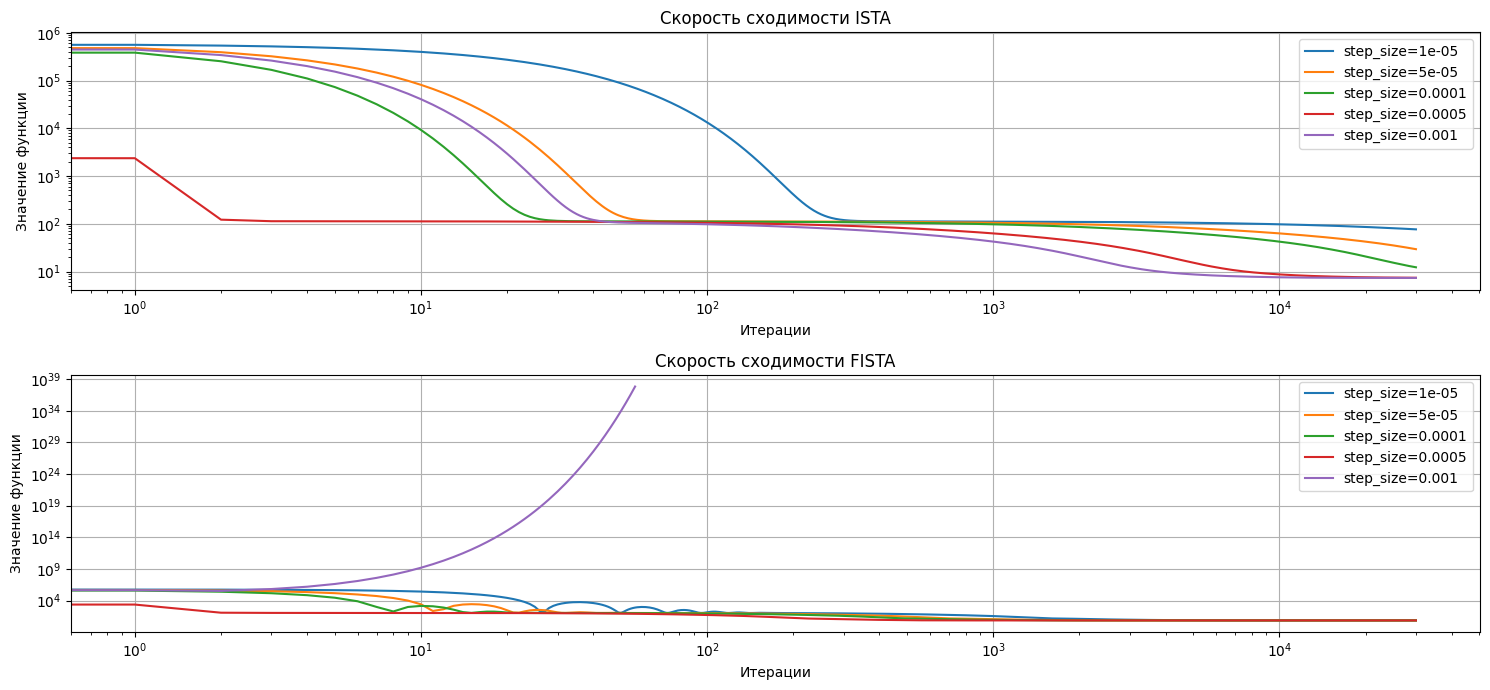

In [ ]:
step_sizes = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
max_iters = 30000

ista_res = {}
fista_res = {}

for step_size in step_sizes:
    history_ista, _ = ISTA(full_oracle, regression_oracle, regularization_oracle, max_iters, x0, step_size)
    history_fista, _ = FISTA(full_oracle, regression_oracle, regularization_oracle, max_iters, x0, step_size)
    ista_res[step_size] = history_ista["func"]
    fista_res[step_size] = history_fista["func"]

plt.figure(figsize=(15, 7))

# Графики для ISTA
plt.subplot(2, 1, 1)
for step_size in step_sizes:
    plt.plot(ista_res[step_size], label=f"step_size={step_size}")
plt.xlabel("Итерации")
plt.ylabel("Значение функции")
plt.title("Скорость сходимости ISTA")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()

# Графики для FISTA
plt.subplot(2, 1, 2)
for step_size in step_sizes:
    plt.plot(fista_res[step_size], label=f"step_size={step_size}")
plt.xlabel("Итерации")
plt.ylabel("Значение функции")
plt.title("Скорость сходимости FISTA")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Выводы:** Видим, что если взять относительно большой step_size у FISTA, то может начаться расхождение. Это связано с тем, что этот метод делает более агрессивные шаги по сравнению с ISTA (за счет инерционного члена t_k). У ISTA step_size, при котором может начаться расхождение, больше, и в данном эксперименте такого шага не оказалось. Видим, что чем больше step_size, тем быстрее идет сходимость (однако важно быть аккуратными и не переборщить)

**Задание 4. (0.4 баллов)** Сравните три метода оптимизации по скорости сходимости, а также по степени разреженности решения (считайте, что число равно нулю, если оно по модулю не превосходит $10^{-2}$). Для этого нарисуйте два графика: первый - зависимость значения функции от номера итерации, а второй - количество ненулевых значений от итерации. Сделайте выводы. **Используйте не менее 30000 итераций**

In [ ]:
step_size = 0.0001
max_iters = 30000

history_subgrad, x_subgrad = subgradient_method(full_oracle, max_iters, x0)
history_ista, x_ista = ISTA(full_oracle, regression_oracle, regularization_oracle, max_iters, x0, step_size)
history_fista, x_fista = FISTA(full_oracle, regression_oracle, regularization_oracle, max_iters, x0, step_size)

def count_nonzero(x, threshold=1e-2):
    return jnp.sum(jnp.abs(x) > threshold)

nonzero_ista = [count_nonzero(x) for x in history_ista["x"]]
nonzero_fista = [count_nonzero(x) for x in history_fista["x"]]
nonzero_subgrad = [count_nonzero(x) for x in history_subgrad["x"]]


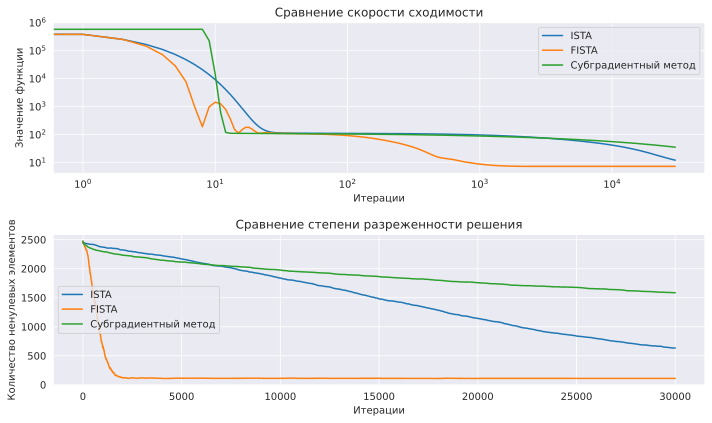

In [17]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(history_ista["func"], label="ISTA")
plt.plot(history_fista["func"], label="FISTA")
plt.plot(history_subgrad["func"], label="Субградиентный метод")
plt.xlabel("Итерации")
plt.ylabel("Значение функции")
plt.title("Сравнение скорости сходимости")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(nonzero_ista, label="ISTA")
plt.plot(nonzero_fista, label="FISTA")
plt.plot(nonzero_subgrad, label="Субградиентный метод")
plt.xlabel("Итерации")
plt.ylabel("Количество ненулевых элементов")
plt.title("Сравнение степени разреженности решения")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Выводы:** Мы видим, что ожидаемо, FISTA сошлась быстрее всего. Субградиентный метод сходится хуже всего. Это может быть связано с тем, что ISTA и FISTA учитывают структуру конкретной задачи, а субградиентный метод плохо адаптируется к негладкости.

Также видим достаточно большую разряженность решения (особенно быстро этого достигает FISTA), что доказывает то, что LASSO действительно производит отбор признаков.


**Бонус 1. (1 балл)** Есть множество стратегий выбора шага для субградиентного метода, попробуйте следующие

* Scaled gradient norm: $\alpha_k=\frac{\alpha_0}{\|g_k\|}$
* Scaled gradient norm: $\alpha_k=\frac{1}{\sqrt{k}\|g_k\|}$

Сравните такие стратегии, если какая-то из них оказалась лучше предыдущей, то сравните метод с ISTA/FISTA. Сделайте выводы

In [116]:
def subgradient_method_v1(oracle, max_iters, x0):
    """
    Функция, реализующая субградиентный метод
    :oracle - оракул
    :max_iters - максимальное количество итераций
    :x0 - начальная точка

    Функция возвращает историю (наименьшее значение функции по итерациям) и итоговую точку
    """
    history = {}
    history["func"] = [oracle(x0)]
    history["x"] = [x0]
    best_value = history["func"][0]
    x = x0
    best_x = x0
    alpha0=1

    for k in range(max_iters):
        grad = oracle.grad(x)
        subgrad_l1 = jnp.sign(x)
        subgrad = grad + oracle.gamma * subgrad_l1

        step_size = alpha0 / np.linalg.norm(grad, ord=2)

        x = x - step_size * subgrad

        value = oracle(x).item()  # Преобразуем в скаляр

        if value < best_value:
            best_value = value
            best_x = x

        history["func"].append(best_value)
        history["x"].append(best_x)


    return history, best_x

**Выводы:**

In [133]:
def subgradient_method_v2(oracle, max_iters, x0):
    """
    Функция, реализующая субградиентный метод
    :oracle - оракул
    :max_iters - максимальное количество итераций
    :x0 - начальная точка

    Функция возвращает историю (наименьшее значение функции по итерациям) и итоговую точку
    """
    history = {}
    history["func"] = [oracle(x0)]
    history["x"] = [x0]
    best_value = history["func"][0]
    x = x0
    best_x = x0


    for k in range(max_iters):
        grad = oracle.grad(x)
        subgrad_l1 = jnp.sign(x)
        subgrad = grad + oracle.gamma * subgrad_l1

        step_size = 1 / (np.sqrt(k) * np.linalg.norm(grad, ord=2))

        x = x - step_size * subgrad

        value = oracle(x).item()  # Преобразуем в скаляр

        if value < best_value:
            best_value = value
            best_x = x

        history["func"].append(best_value)
        history["x"].append(best_x)


    return history, best_x

In [ ]:
subgrad_m = subgradient_method(full_oracle, 30000, x0)
subgrad_v1_m = subgradient_method_v1(full_oracle, 30000, x0)

In [134]:

subgrad_v2_m = subgradient_method_v2(full_oracle, 30000, x0)

<ipython-input-100-fb67f930961b>:23: RuntimeWarning: divide by zero encountered in scalar divide
  step_size = 1 / (np.sqrt(k) * np.linalg.norm(grad, ord=2))


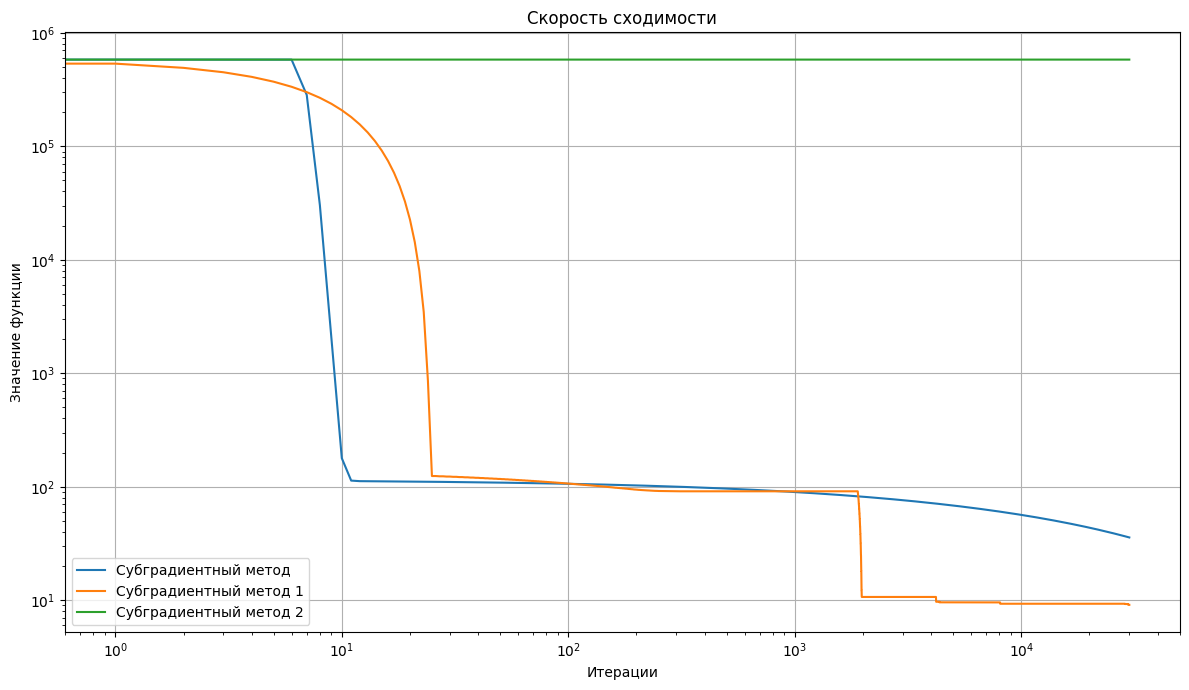

In [135]:
plt.figure(figsize=(12, 7))

# Графики для subgrad
# plt.subplot(3,1, 1)
plt.plot(subgrad_m[0]["func"], label="Субградиентный метод")
plt.plot(subgrad_v1_m[0]["func"], label="Субградиентный метод 1")
plt.plot(subgrad_v2_m[0]["func"], label="Субградиентный метод 2")
plt.xlabel("Итерации")
plt.ylabel("Значение функции")
plt.title("Скорость сходимости")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

Видим, что субградиентный метод с шагом  $\alpha_k=\frac{\alpha_0}{\|g_k\|}$ показал себя лучше всех (по карйней мере по сравнению с обычным субрадиентным методом, так как метод с шагом $\alpha_k=\frac{1}{\sqrt{k}\|g_k\|}$ у меня видимо посчитался неправильно). Это произошло из-за того, что вблизи оптимума происходило деление на норму, что делало шаг более равномерным.

**Бонус 2. (1.5 баллов)** Часто жизнь оказывается такова, что мы не можем подобрать оптимальный константный шаг, потому что это может быть дорого, а константу гладкости функции мы можем и не знать (да, оптимальный размер шага зависит от нее). В этом случае можно искать шаг $\alpha_{k}$ при помощи backtracking search:

$$f(x_{k+1})\leq f(x_k) + \langle \nabla f_k, x_{k+1}-x_k \rangle + \frac{1}{2\alpha_k}\|x_k-x_{k+1}\|^2$$

А в качестве процедуры поиска использовать бинарный поиск

*Замечание.* Внимательный студент может заметить, что в этом случае мы пытаемся подобрать $\alpha_{k}$ так, чтобы оно было похоже на $\frac{1}{L}$, который и является оптимальным размером шага.

Попробуйте реализовать данную стратегию, сравните ее с уже реализованными методами. Дополнительно посчитайте, сколько раз вы вычисляли саму функцию. Сделайте выводы.

In [ ]:
### YOUR CODE HERE

**Выводы:**

### Часть 2 (1.5 балла). ADMM for matrix completion

Рассмотрим задачу восстановления матрицы $Y$. Мы наблюдаем только небольшой набор элементов матрицы $Y$, множество индексов известных элементов обозначим через $E$. То есть мы знаем $Y_{ij}$ для всех $(i,j) \in E$, и не знаем $Y_{ij}$ для всех $(i,j) \notin E$.

Понятно, что без наличия какой-либо дополнительной информации о матрице $Y$ эта постановка является тривиальной: любая матрица $X$, для которой выполнено $X_{i,j} = Y_{i,j}, \quad (i,j) \in E$ является разумным ответом. Таких матриц бесконечно много. Соответственно задача восстановления матриц обычно рассматривается как частный случай задачи приближения матрицы, а критерий качества (целевая функция) говорит не столько о близости $X$ к $Y$, сколько о полезных свойствах матрицы $X$ (этими свойствами матрица $Y$ может и не обладать).

Одна из самых популярных постановок является задача о поиске наилучшего приближения заданной матрицы матрицей малого ранга:

$$
\begin{align*}
& \min_{X} rank(X) \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$

В общем случае эта задача является NP-трудной. Для того чтобы обойти это препятствие ранг матрицы аппроксимируется той или иной выпуклой функцией от матрицы $X$. Стандартным выбором является переход к постановке задачи с использованием ядерной нормы

$$
\begin{align*}
& \min_{X}\|X \|_* \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$

**Задание 1. (0.5 балла)** Сведите полученную задачу к виду, пригодному для решения с помощью ADMM. Запишите итерации, получите аналитические выражения для каждого шага.

**Решение:**
Чтобы свести задачу к виду, пригодному для ADMM, надо ввести вспомогательную переменную $Z$, которая могла бы нам помочь разделить задачу на 2 части. Таким образом наша исходня задача
$$
\begin{align*}
& \min_{X}\|X \|_* \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$
сведется к
$$
\begin{align*}
& \min_{X}\|X \|_* \\
& Z = X \\
& Z_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$

Лагранжиан этой задачи можно записать следующим образом:
$$\mathcal{L}(X,Z,\Lambda) = \|X \|_* + \text{tr}(\Lambda^T(X - Z)) + \frac{r}{2}\|X - Z\|^2_F$$
Мы не записываем условие $Z_{i,j} = Y_{i,j}$ в лагранжиан явно, так как он связывает переменные $X$ и $Z$, а не $Z$ и $Y$. Вышеуказанное условие мы учитываем в шаге обновления по $Z$.

$$X^{k+1} = \text{argmin}({\|X \|_* + \frac{r}{2}\|X - (Z^k - \frac{\Lambda}{r})\|^2_F})$$
$$Z^{k+1} = \text{argmin}({\frac{r}{2}\|X^k - (Z - \frac{\Lambda}{r})\|^2_F}), \quad Z_{i,j} = Y_{i,j}, (i,j) \in E$$
$$\Lambda^{k+1} = \text{argmin}({\Lambda^k + r(X^{k+1} - Z^{k+1})})$$

На каждой итерации решается задача свертки сингулярных значений:

1. Вычисляем **SVD**: $X^{k+1} + U^k = U \Sigma V^T$.
2. Применяем soft-thresholding к диагонали $\Sigma$:

   $$
   \hat{\Sigma}_{ii} = \max(0, \Sigma_{ii} - 1/\rho)
   $$

3. Обновляем переменную $Z$:

   $$
   Z^{k+1} = U \hat{\Sigma} V^T.
   $$

#### Обновление двойственного множителя $U$

$$
U^{k+1} = U^k + X^{k+1} - Z^{k+1}
$$

Итак, каждая итерация ADMM выполняет три ключевых шага:
1. Обновление $X$ .
2. Обновление $Z$ .
3. Обновление $U$ .


**Задание 2.(0.5 балла)** Реализуйте полученные формулы.

*Замечание*. Вы все еще в праве менять интерфейсы функций так, как хотите

In [74]:
from jax.scipy.linalg import svd


def MC_update_X(Z, lambda_, r):
    """
    Функция, обновляющая значение X для задачи Matrix Completion, используя переменные Z, lambda_ и r
    """
    ### YOUR CODE HERE
    # Вычисляем матрицу для SVT
    A = Z - lambda_ / r     # просто сделали замену

    # Выполняем SVD
    U, S, Vt = svd(A, full_matrices=False)

    # Soft-thresholding для сингулярных значений
    S_thresh = jnp.maximum(S - 1 / r, 0)

    # Восстанавливаем X
    X = U @ jnp.diag(S_thresh) @ Vt
    return X


def MC_update_Z(X, lambda_, r, Y, mask):
    """
    Функция, обновляющая значение X для задачи Matrix Completion, используя переменные Z, lambda_, r, Y и маску E
    """
    ### YOUR CODE HERE
    # Обновляем известные элементы
    # Обновляем Z
    Z = X + lambda_ / r

    # Фиксируем известные элементы
    Z = Z.at[mask].set(Y[mask])

    return Z


def MC_ADMM(Y, mask, tol, max_iters, r, Y_true):
    """
    Функция, решающая задачу Matrix Completion для известных пикселей Y в точках mask
    Считаем, что метод сходится, если ядерная норма поменялась за итерацию менее чем на tol
    Максимальное количество итераций - max_iters
    Параметр r для ADMM задается в интерфейсе
    Для вычисления различных метрик вам может потребоваться знание исходного изображения
    """
    ### YOUR CODE HERE
    # Инициализация
    X = jnp.zeros_like(Y)
    Z = jnp.zeros_like(Y)
    lambda_ = jnp.zeros_like(Y)

    history = []

    for _ in range(max_iters):
        X_new = MC_update_X(Z, lambda_, r)
        Z_new = MC_update_Z(X_new, lambda_, r, Y, mask)
        lambda_ = lambda_ + r * (X_new - Z_new)

        # Критерий сходимости
        if jnp.linalg.norm(Z_new - Z, ord='fro') < tol:
            break

        Z = Z_new
        history.append(jnp.linalg.norm(Z, ord='nuc'))  # Ядерная норма

    return Z, history
    pass

**Задание 3. (0 баллов)** Выберите любимую картинку, на которой вы будете тестировать алгоритм, покажите ее

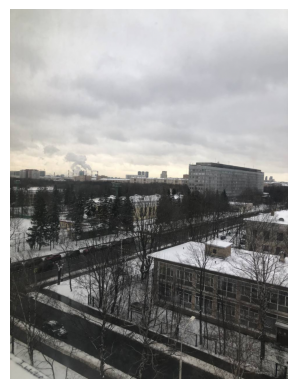

In [78]:
Y_true = cv2.imread("grey.jpg")
Y_true = cv2.cvtColor(Y_true, cv2.COLOR_BGR2RGB) / 255
plt.grid(False)
plt.axis(False)
plt.imshow(Y_true)
plt.show()

**Задание 4.(0.3 балла)** Покажите работоспособность алгоритма:

1) Нарисуйте график зависимости ошибки восстановления картинки от номера итерации

2) Покажите визуально, что он действительно решает задачу восстановления изображения при отсутствии 50 процентов пикселей

*Замечание*. Вы можете работать с изображением как с черно-белым, но интереснее будет запускать ADMM на каждом из каналов :)

In [79]:
def generate_mask(shape, size, seed=42):
    """
    Генерирует маску для изображения формы shape, оставляющую только size пикселей
    """
    np.random.seed(seed)
    mask = np.full(np.prod(shape), False)
    mask[:size] = True
    np.random.shuffle(mask)
    mask = mask.astype(bool)
    return mask.reshape(shape)

In [92]:
# искажённое изображение
Y = jnp.zeros_like(Y_true)

total_pixels = Y_true.shape[0] * Y_true.shape[1]

num_pixels_to_spoil = int(total_pixels * 0.5)

# Генерация маски, сколько пикселей мы сохраним
mask = generate_mask(Y_true.shape[:2], num_pixels_to_spoil)

# Применяем маску ко всем каналам
Y = Y.at[mask].set(Y_true[mask])

# Восстанавливаем изображение с помощью ADMM
restored_channels = []
histories = []

for i in range(Y.shape[2]):  # Проход по каналам
    res, history = MC_ADMM(Y[..., i], mask, tol=0.1, max_iters=100, r=2, Y_true=Y_true[..., i])
    restored_channels.append(res)
    histories.append(history)

# Собираем восстановленное изображение
Z_recovered = jnp.stack(restored_channels, axis=-1)


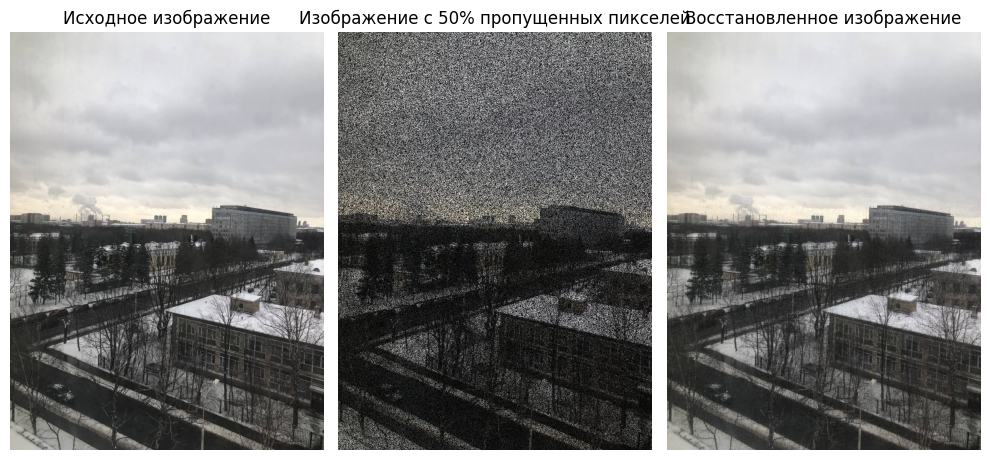

In [93]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.grid(False)
plt.axis(False)
plt.imshow(Y_true)
plt.title("Исходное изображение")

plt.subplot(1, 3, 2)
plt.grid(False)
plt.axis(False)
plt.imshow(Y)
plt.title("Изображение с 50% пропущенных пикселей")

plt.subplot(1, 3, 3)
plt.grid(False)
plt.axis(False)
plt.imshow(Z_recovered)
plt.title("Восстановленное изображение")

plt.tight_layout()
plt.show()


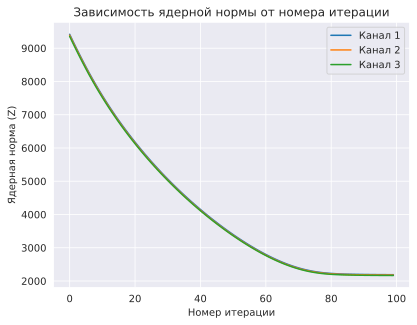

In [23]:
plt.figure()
for i, history in enumerate(all_histories):
    plt.plot(history, label=f"Канал {i+1}")
plt.xlabel("Номер итерации")
plt.ylabel("Ядерная норма (Z)")
plt.title("Зависимость ядерной нормы от номера итерации")
plt.legend()
plt.grid(True)
plt.show()

Видим, что алгоритм действительно хорошо восстанавливает исходное изображение при потере половины пикселей.

**Задание 5.(0.2 балла)** Посмотрите на то, как влияет количество удаленных пикселей на качество восстановления, как с точки зрения **нормы разности** истинного изображения и восстановленного, так и **с визуальной точки зрения**. Посмотрите удаление 30, 50 и 80 процентов пикселей (приветствуется смотреть и другие значения, например, 90). **ВНИМАНИЕ.** Перечитайте первое предложение внимательно, нужно провести анализ качества восстановления по двум параметра.

*Замечание*. Вы можете работать с изображением как с черно-белым, но интереснее будет запускать ADMM на каждом из каналов :)

In [83]:
def plot_results(X, Y_true, mask, alphas, figsize=(10, 30)):
    """
    Функция, отрисовывающая получившиеся результаты
    :X - list восстановленных изображений (цветных)
    :Y_true - настоящее изображение
    :mask - list масок
    :alphas - list состоящий из долей удаленных пикселей
    Функция написана в предположении, что Вы работаете с цветными изображениями, если вы выбрали работать с чб, то
    не забудьте поменять код
    """
    fig, ax = plt.subplots(nrows=len(X), ncols=3, figsize=figsize)
    for j in range(len(X)):
        tmp = np.copy(Y_true)
        current_mask = np.stack((~mask[j], ~mask[j], ~mask[j]), axis=2)
        tmp[current_mask] = 0
        content = [Y_true, tmp, X[j]]
        titles = ["Оригинальное изображение",
          f"Изображение с удаленными\n {int(alphas[j] * 100)}% пикселями",
          "Восстановленное изображение"]
        for i in range(3):
            ax[j][i].set_title(titles[i])
            ax[j][i].imshow(content[i])
            ax[j][i].grid(False)
            ax[j][i].axis(False)
    plt.show()

In [81]:
def restore_image(image):
    # damaged_image = jnp.zeros((image.shape[0], image.shape[1], image.shape[2]))

    total_pixels = image.shape[0] * image.shape[1]

    num_pixels_to_spoil_30 = int(total_pixels * 0.7)
    num_pixels_to_spoil_50 = int(total_pixels * 0.5)
    num_pixels_to_spoil_80 = int(total_pixels * 0.2)
    num_pixels_to_spoil_90 = int(total_pixels * 0.1)

    num_pixels = [num_pixels_to_spoil_30, num_pixels_to_spoil_50, num_pixels_to_spoil_80, num_pixels_to_spoil_90]
    restored_images = []
    deltas = []
    masks = []
    for k in range(len(num_pixels)):
        mask = generate_mask(image.shape[:2], num_pixels[k])
        masks.append(mask)
        channels = [Y_new[..., k] for k in range(image.shape[2])]
        channels_true = [Y_true[..., k] for k in range(image.shape[2])]

        restored = []
        for i in range(image.shape[2]):  # Проход по каналам
            # Обновление маски
            channels[i] = channels[i].at[mask].set(channels_true[i][mask])

            # Решаем задачу восстановления
            res, _ = MC_ADMM(channels[i], mask, tol=0.1, max_iters=100, r=2, Y_true=Y_true)
            restored.append(res)

        # восстановили изображение
        restored_image = jnp.stack(restored, axis=-1)
        # считаем норму разности восстановленного изображения и исходного
        delta = jnp.sqrt(jnp.sum((image - restored_image) ** 2))

        restored_images.append(restored_image)
        deltas.append(delta)

    return restored_images, deltas, masks

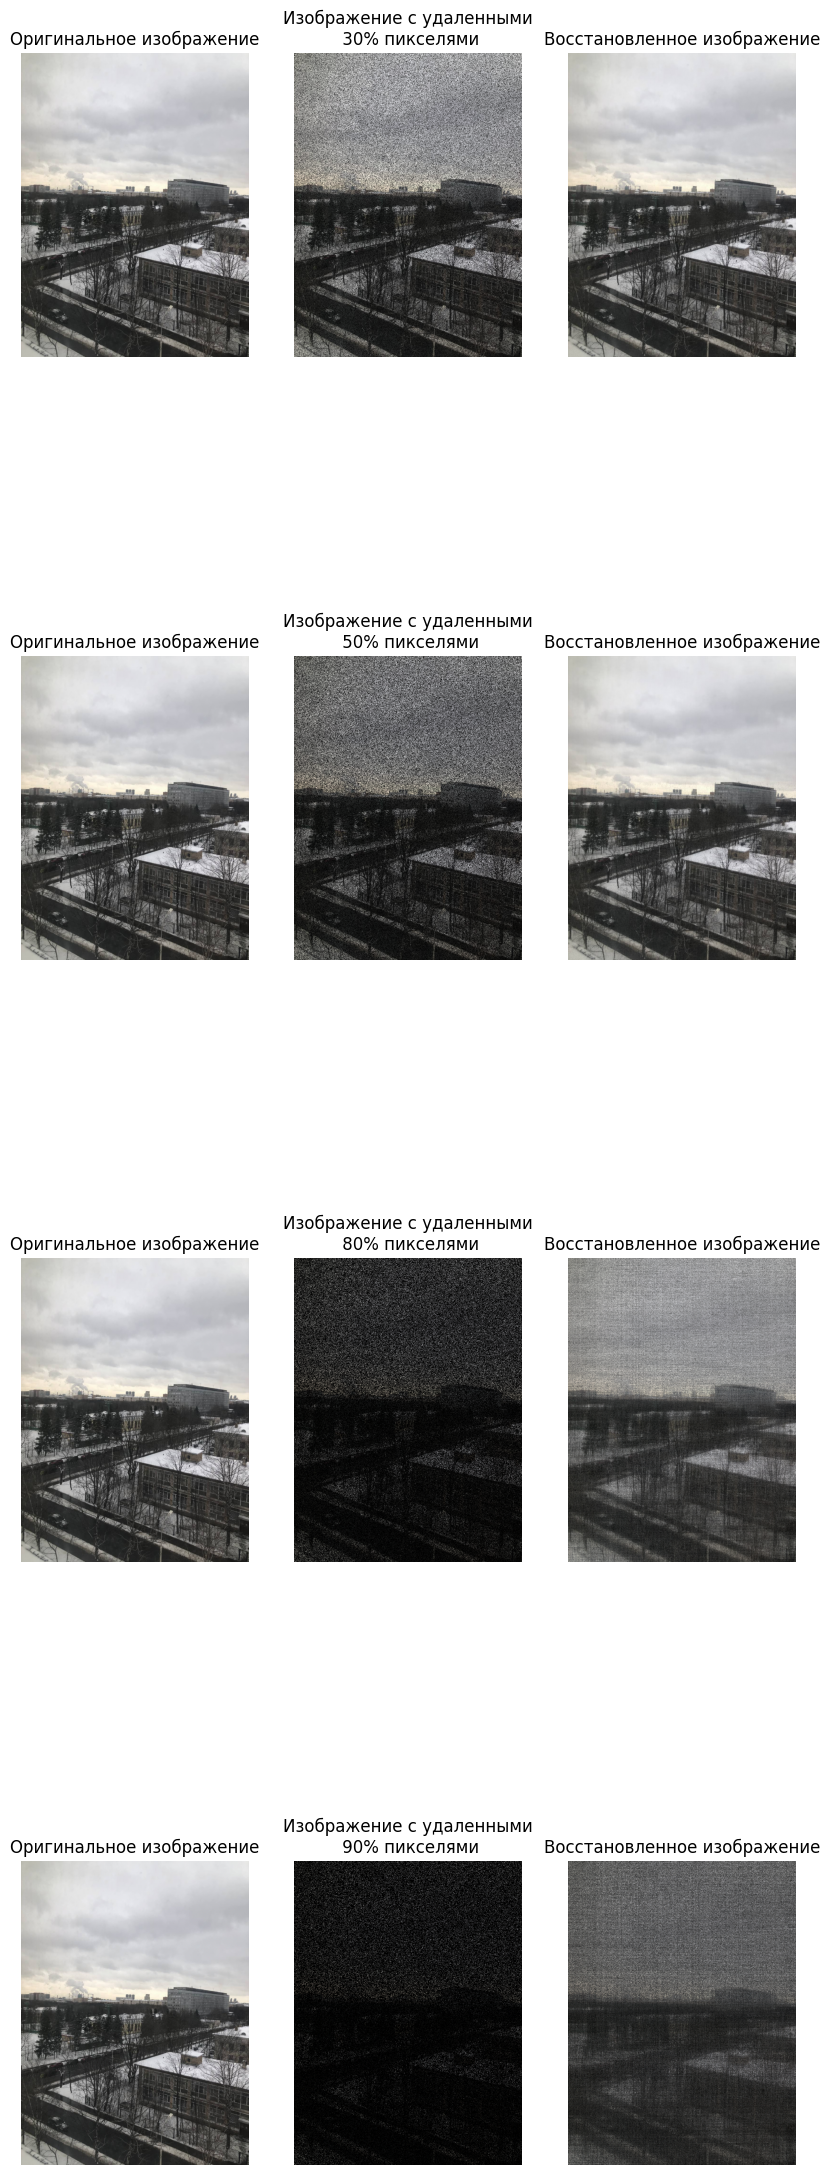

Доля удаленных пикселей: 30%, Норма разности: 57.7089
Доля удаленных пикселей: 50%, Норма разности: 87.1158
Доля удаленных пикселей: 80%, Норма разности: 431.4723
Доля удаленных пикселей: 90%, Норма разности: 703.2302


In [136]:
### YOUR CODE HERE
image = cv2.imread("grey.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255

# alphas - доли удаленных пикселей
alphas = [0.3, 0.5, 0.8, 0.9]
restored_images, deltas, masks = restore_image(image)

plot_results(restored_images, image, masks, alphas)

for alpha, delta in zip(alphas, deltas):
    print(f"Доля удаленных пикселей: {int(alpha * 100)}%, Норма разности: {delta:.4f}")

### Часть 3. (2.95 баллов) Редукция дисперсии

Часто при обучении нейронных сетей возникает вопрос выбора параметра `batch_size`, как вы знаете батчирование (разбирали на паре) помогает уменьшить дисперсию стохастического градиента и следовательно улучшает сходимость. К сожалению, на практике мы не можем взять `batch_size` достаточно большим из-за ограничений видеопамяти, а стохастический градиент все еще достаточно шумный (имеет высокую дисперсию).

В этой части Вам предлагается реализовать метод **SVRG** и продемонстрировать его работу.

*Замечание*: в базовой реализации мы будем предполагать, что раз в $N$ итераций мы сможем сделать `backward pass` с большим батчом. На практике такое предположение не выполняется. Исправление данной проблемы является чисто технической задачей, которую не обязательно решать в учебных целях.

**Важно:** В этой части для написания выводов вам потребуются графики обучения. Без графиков и выводов пункт **не будет** засчитан. Все логи и необходимой код для отрисовки графиков написан за вас через `wandb`, который умеет автоматически формировать отчеты. Чтобы ваш ноутбук не весил десятки мегабайт прикладывайте отчет отдельно! Подробнее можно изучить либо в документации `wandb` либо [на видео](https://www.youtube.com/watch?v=2xeJIv_K_eI&ab_channel=Weights%26Biases).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import os
import random
import copy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset

from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [ ]:
def set_global_seed(seed: int) -> None:
    """Set global seed for reproducibility.
    :param int seed: Seed to be set
    """
    random.seed(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_global_seed(42)

**Задание 1. (0.1 баллов)** Предварительные сведения


При реализации **SVRG** вам потребуется сохранять веса и градиенты модели. В этом задании вам предлагается поменять местами (свапнуть) веса двух моделей с целью упражнения и упрощения понимания дальнейшего кода.

*Подсказка 1:* Обратите внимание на функцию `copy.deepcopy`

*Замечание:* Вы можете использовать функции `set_weights`, `set_grad`, но также можно реализовать их сами

**Важно:** `copy.deepcopy` не копирует градиенты, которые хранятся в параметрах нейронной сети [источник 1](https://github.com/pytorch/pytorch/issues/3307) [источник 2](https://github.com/pytorch/pytorch/issues/95711). Поэтому в дальнейшем крайне рекомендуется использовать функцию `set_grad` и `set_weights`. В противном случае у вас, скорее всего, где-то будет ошибка.

In [ ]:
@torch.no_grad()
def set_weights(parameters, parameters_new):
    """
    Функция устанавливает веса parameters_new как веса для parameters
    """

    # detach() – отсоединяет тензор от вычислительного графа, чтобы предотвратить вычисление градиентов для p1.
    # clone() – создает копию данных, чтобы p1 имел отдельный тензор, а не ссылку на p2.data
    for p1, p2 in zip(parameters, parameters_new):
        p1.data = p2.data.detach().clone()

@torch.no_grad()
def set_grad(parameters, parameters_new):
    """
    Функция устанавливает градиенты parameters_new как градиенты для parameters
    """
    for p1, p2 in zip(parameters, parameters_new):
        if p2.grad is not None:
            p1.grad = p2.grad.detach().clone()

In [ ]:
# Нейросети, веса которых вам нужно поменять местами
set_global_seed(42)

net1 = nn.Sequential(nn.Linear(4, 4), nn.ReLU())
net2 = nn.Sequential(nn.Linear(4, 4), nn.ReLU())

net1_p = list(net1.parameters())
net2_p = list(net2.parameters())

print("Параметры net1\n", net1_p)
print("Параметры net2\n", net2_p)

Параметры net1
 [Parameter containing:
tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
        [-0.1096,  0.1009, -0.2434,  0.2936],
        [ 0.4408, -0.3668,  0.4346,  0.0936],
        [ 0.3694,  0.0677,  0.2411, -0.0706]], requires_grad=True), Parameter containing:
tensor([ 0.3854,  0.0739, -0.2334,  0.1274], requires_grad=True)]
Параметры net2
 [Parameter containing:
tensor([[-0.2304, -0.0586, -0.2031,  0.3317],
        [-0.3947, -0.2305, -0.1412, -0.3006],
        [ 0.0472, -0.4938,  0.4516, -0.4247],
        [ 0.3860,  0.0832, -0.1624,  0.3090]], requires_grad=True), Parameter containing:
tensor([ 0.0779,  0.4040,  0.0547, -0.1577], requires_grad=True)]


Поменяйте местами веса моделей, код необходимо написать ниже

In [ ]:
# Сохраняем веса net1 во временную переменную
temp_net1_p = [p.detach().clone() for p in net1_p]
net2.zero_grad()
set_weights(net1.parameters(), net2_p)

set_weights(net2.parameters(), temp_net1_p)

print("Параметры net1 после обмена\n", list(net1.parameters()))
print("Параметры net2 после обмена\n", list(net2.parameters()))

Параметры net1 после обмена
 [Parameter containing:
tensor([[-0.2304, -0.0586, -0.2031,  0.3317],
        [-0.3947, -0.2305, -0.1412, -0.3006],
        [ 0.0472, -0.4938,  0.4516, -0.4247],
        [ 0.3860,  0.0832, -0.1624,  0.3090]], requires_grad=True), Parameter containing:
tensor([ 0.0779,  0.4040,  0.0547, -0.1577], requires_grad=True)]
Параметры net2 после обмена
 [Parameter containing:
tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
        [-0.1096,  0.1009, -0.2434,  0.2936],
        [ 0.4408, -0.3668,  0.4346,  0.0936],
        [ 0.3694,  0.0677,  0.2411, -0.0706]], requires_grad=True), Parameter containing:
tensor([ 0.3854,  0.0739, -0.2334,  0.1274], requires_grad=True)]


Попробуем теперь свапнуть местами градиенты.

*Подсказка 1:* Чтобы было куда сохранять градиенты надо будет сделать копию параметров

In [ ]:
x = torch.ones((1, 4))
net1(x).sum().backward()

x = torch.arange(4).reshape(1, 4).float()
net2(x).sum().backward()

print("Градиенты net1\n", list(p.grad for p in net1.parameters()))
print("Градиенты net2\n", list(p.grad for p in net2.parameters()))

Градиенты net1
 [tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.]]), tensor([0., 0., 0., 1.])]
Градиенты net2
 [tensor([[0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.]]), tensor([1., 1., 1., 1.])]


In [ ]:
tmp = copy.deepcopy(net1_p)
set_grad(tmp, net1_p)
set_grad(net1_p, net2_p)
set_grad(net2_p, tmp)

print("Градиенты net1\n", list(p.grad for p in net1.parameters()))
print("Градиенты net2\n", list(p.grad for p in net2.parameters()))

Градиенты net1
 [tensor([[0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.]]), tensor([1., 1., 1., 1.])]
Градиенты net2
 [tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.]]), tensor([0., 0., 0., 1.])]


**Задание 2. (0.2 баллов)** Реализуйте `SGD`

В качестве базового класса будем использовать [torch.optim.Optimizer](https://pytorch.org/docs/stable/optim.html#base-class). Цель этого пункта познакомить вас с тем, как внутри оптимизатора лежат веса и градиенты модели. Вам же необходимо написать шаг стохастического градиентного спуска.

**Подсказка 1:** Обратите внимание на функцию `torch.add` и ее аргументы.

In [ ]:
class SGDBase(optim.Optimizer):

    def __init__(self, params, lr):

        # Определение Базового класса
        defaults = dict(lr=lr)
        super().__init__(params, defaults)

    def step(self):

        # Итерация по всем группам параметров
        for group in self.param_groups:

            # Итерация по всем параметрам
            for p in group['params']:

                # Проверка на то, обучаем ли параметр
                if p.grad is None:
                    continue

                # В torch.optim.Optimizer параметры хранятся внутри group, и lr нужно брать оттуда
                lr = group['lr']
                # p.data - это веса
                # p.data -= lr * p.grad
                p.data.add_(-lr * p.grad)

Проверим работоспособность на простой функции и сравним наш алгоритм, с реализацией `optim.SGD`

In [ ]:
def foo(x):
    return (x - 1.0) ** 2

def testing_optimizer(x_0, optimizer_class, num_steps=10):
    x = nn.Parameter(data=x_0.clone()) # x - обучаемый параметр
    optimizer = optimizer_class([x], lr=0.1)
    history = [x.item()]

    for _ in range(num_steps):
        optimizer.zero_grad()

        loss = foo(x)
        loss.backward()

        optimizer.step()
        history.append(x.item())


    return np.array(history)

In [ ]:
x_0 = torch.tensor(10.0)
history_base = testing_optimizer(x_0, optimizer_class=SGDBase)
history_base

array([10.        ,  8.19999981,  6.75999975,  5.6079998 ,  4.68639994,
        3.94912004,  3.35929608,  2.88743687,  2.50994945,  2.20795965,
        1.96636772])

In [ ]:
x_0 = torch.tensor(10.0)
history_pytorch = testing_optimizer(x_0, optimizer_class=optim.SGD)
history_pytorch

array([10.        ,  8.19999981,  6.75999975,  5.6079998 ,  4.68639994,
        3.94912004,  3.35929608,  2.88743687,  2.50994945,  2.20795965,
        1.96636772])

In [ ]:
assert (history_base == history_pytorch).all()

**Задание 3. (0.3 баллов)** Обертка над шагом обучения

Для дальнейшего удобства использования, напишем небольшой класс-обертку. Такой ход позволит скрыть от цикла обучения все функции связанные с шагом обучения. Благодаря этому мы сможем добавить **SVRG** (который влияет только на итерацию обучения) переопределив класс-обертку. Тем самым наша реализация **SVRG** будет спрятана в обертки и не будет влиять на код цикла обучения.

*Замечание:* Ниже в целях уменьшения кода, мы предполагаем что в оптимизаторе только одна группа параметров. То есть оптимизаторы вида:

```python

optim.Adam([
        {"params": net1.parameters(), "lr": lr1},
        {"params": net2.parameters(), "lr": lr2},
    ...
    ])

```

**НЕ** будут поддерживаться

**Важно:** Внимательно изучите функции класса-обертки и базовый пример. В дальнейшем мы будем переопределять функцию `step_fn` для SVRG.

In [ ]:
class WrapperBase:

    def __init__(self, optimizer, loss_fn):
        """
        :optimizer - базовый оптимизатор
        :loss_fn - функция по батчу вычисляющая loss и другие важные в ходе обучения значения.
        Функция возвращает словарь, в котором обязательно присутсвует ключ 'loss'.
        Значение функции потерь храняться по ключу 'loss'

        """

        self.optimizer = optimizer
        self.loss_fn = loss_fn

    def get_param_groups(self):
        """
        return
        Ссылку на параметры модели, т.е. изменение значения, меняет значение внутри модели

        Замечание: захардкожено [0]
        """
        return self.optimizer.param_groups[0]['params']

    def get_group(self):
        """
        return
        Возвращает группу параметров оптимизатора

        Замечание: захардкожено [0]
        """
        return self.optimizer.param_groups[0]

    def zero_grad(self):
        """
        Обнуляет все градиенты для параметров оптимизатора
        """

        self.optimizer.zero_grad()
        # for p in self.parameters():
        #     if p.grad is not None:
        #         p.grad = np.zeros(p.grad.shape)
        pass

    def step(self):
        """
        Производит шаг оптимизатора
        """

        self.optimizer.step()
        pass

    def step_fn(self, batch):
        """
        Считает все статистики на батче, производит шаг оптимизации
        return
        Все необходимые статистики для логирования
        """
        self.zero_grad()

        stat_dict = self.loss_fn(batch)
        stat_dict['loss'].backward()
        self.step()

        return stat_dict

Тогда мы можем переписать `testing_optimizer` следующим образом

In [ ]:
def testing_optimizer_wrapper(x_0, optimizer_class, num_steps=10):
    x = nn.Parameter(data=x_0.clone()) # x - обучаемый параметр
    optimizer = optimizer_class([x], lr=0.1)
    optimizer_wrapper = WrapperBase(optimizer, lambda x: {'loss': foo(x)})

    history = [x.item()]

    for _ in range(num_steps):
        optimizer_wrapper.step_fn(x)
        history.append(x.item())


    return np.array(history)

In [ ]:
x_0 = torch.tensor(10.0, requires_grad=True)
history = testing_optimizer(x_0, optimizer_class=optim.SGD)
history_wrapper = testing_optimizer_wrapper(x_0, optimizer_class=optim.SGD)

In [ ]:
assert (history == history_wrapper).all()

**Задание 4. (0.75 баллов)** **SVRG**

Реализуем метод `SVRG` как обёртку над базовым классом оптимизатора (оптимизатор используем условно как удобный интерфейс)

Для начала напомним вид алгоритма из семинара:

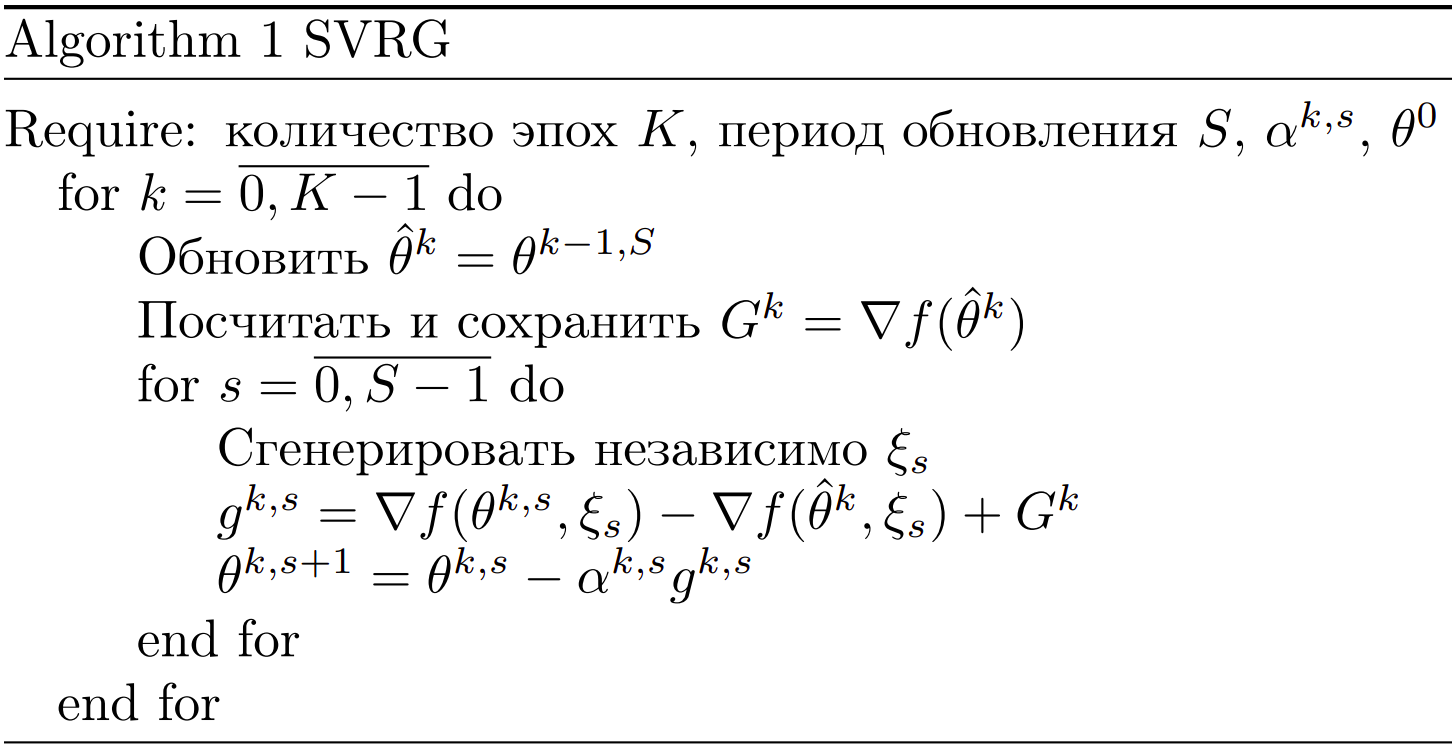

**ВАЖНО**

Мы будем реализовывать чуть другую версию:
    
```python

for i in range(1, N):
    if i % S == 0:
        w_large := w
        Обновить G_s           # градиент по всей выборки (большому батчу) при весах w_large
        
    Засэмплировать батч        # batch
    g_main                     # градиент по batch при весах w
    g_bias                     # градиент по batch при весах w_large
    g = g_main - g_bias + G_s
    
    w = w - lr * g
```

*Замечание:* Вы можете менять интерфейсы классов так, как считаете нужным, предложенный вариант - один из возможных. Главное, чтобы все работало

*Подсказка 1:* Для получения весов по которым ведется оптимизация (веса обучаемой нейронной сети) можно использовать `WrapperBase.get_param_groups()`.

In [ ]:
# import torch
import copy

class SVRG(WrapperBase):
    def __init__(self, optimizer, loss_fn, data, S):
        super().__init__(optimizer=optimizer, loss_fn=loss_fn)
        self.data = data
        self.S = S
        self.counter = 0

    def step_fn(self, batch):
        # Обнуление градинетов модели, чтобы не накладывались при следующих вычислениях
        self.zero_grad()

        # Подсчет градиента на батче
        stat_dict = self.loss_fn(batch)
        loss_main = stat_dict['loss']
        loss_main.backward()

        # Сохранение градиентов и весов посчитанных на батче
        params_cur = []
        for p in self.get_param_groups():
            p_copy = p.data.clone()
            p_copy.grad = p.grad.clone()
            params_cur.append(p_copy)

        # Обнуление градинетов модели, чтобы не накладывались при следующих вычислениях
        self.zero_grad()

        if self.counter == 0:
            # Подсчет градиента на большом множестве
            state_dict_large = self.loss_fn(self.data)
            loss_large = state_dict_large['loss']
            loss_large.backward()

            # Сохранение градиентов и весов посчитанных на большом батче
            self.params_large = []
            for p in self.get_param_groups():
                p_copy = p.data.clone()
                p_copy.grad = p.grad.clone()
                self.params_large.append(p_copy)

            # Обнуление градинетов модели, чтобы не накладывались при следующих вычислениях
            self.zero_grad()

        # Установка весов модели (для которой считали градиент на большом батче)
        set_weights(list(self.get_param_groups()), self.params_large)

        # Подсчет градиента на батче для поправки
        stat_dict_bias = self.loss_fn(batch)
        loss_bias = stat_dict_bias['loss']
        loss_bias.backward()

        # Сохранение градиентов посчитанных на батче поправки
        params_bias = []
        for p in self.get_param_groups():
            p_copy = p.data.clone()
            p_copy.grad = p.grad.clone()
            params_bias.append(p_copy)

        # Востановлние весов и градиентов прошлой модели
        set_weights(list(self.get_param_groups()), params_cur)
        set_grad(list(self.get_param_groups()), params_cur)

        for p_main, p_large, p_bias in zip(self.get_param_groups(), self.params_large, params_bias):

            if p_main.grad is None:
                continue

            # Подсчет градиента с поправкаи
            d_p = p_main.grad - p_bias.grad + p_large.grad

            # Подменяем градиенты для оптимизатора
            p_main.grad = d_p.detach().clone()

        # Шаг основного оптимизатора с новыми градиентами
        self.step()

        # Обновление счётчика
        self.counter = (self.counter + 1) % self.S

        accuracy = stat_dict.get("accuracy", None)
        return {"loss": loss_main, "accuracy": accuracy}


**Задание 5: демонстрация использования оптимизатора (0 баллов)**: Эксперименты на  `MNIST`
    
Для корректных выводов по работе  **SVRG** нам необходимо:

1) Задача на реальных данных

2) Baseline решения этой задачи


В качестве данных предлагается `MNIST`, в качестве Baseline следующий код.


Напомним, что **SVRG** придуман для понижения дисперсии стохастического градиента. Поэтому будем иметь 2 стандартных решения: с высокой и низкой дисперсией стохастического градиента.


Вам необходимо обучить 2 и больше модели, с которыми Вы дальше будете сравниваться. Предполагается, что у одной модели будет **высокая** дисперсия стохастического градиента, а у другой **низкая**. Другие модели тоже можно обучать для вывода (но эти 2 необходимо получить).


**Важно**: Все эксперименты должны быть воспроизводимы, поэтому фиксируете сид

**Важно**: Если будете менять обучение, постарайтесь, чтобы оно не заняло более 10 минут вычислений на гпу для 1 модели

*Замечание:* Весь код ниже можно менять, главное выполнить задание 6 и показать 2 baseline, с которыми Вы дальше будете сравниваться

**Подсказка 1:** Для всех результатов достаточно 1к итераций. Если метод который должен был сойтись не сошелся за 1к итераций, то скорее всего где-то ошибка.



In [ ]:
device = "cpu"

if torch.cuda.is_available():
    device = "cuda:0"

device

'cpu'

`Подготовка данных`

В качестве предобработки мы будем только нормализовывать данные.

In [ ]:
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5), std=(0.5))])

train_dataset = MNIST(root=data_dir, train=True, download=True,
                      transform=transform)

test_dataset = MNIST(root=data_dir, train=False, download=True,
                     transform=transform)

`Архитектура модели`

Так как мы решаем задачу классификации `MNIST`, то нам хватит очень маленького MLP. Наша цель не выбить выше качество, а исследовать влияние стохастического градиента.

In [ ]:
class MnistClassifier(nn.Module):

    def __init__(self, hidden_dim=10, image_dim=28):

        super().__init__()

        self.fc_input = nn.Sequential(nn.Flatten(),
                                      nn.Linear(image_dim ** 2, hidden_dim),
                                      nn.SiLU())

        self.fc_out = nn.Sequential(nn.Linear(hidden_dim, 10))


    def forward(self, x):

        return self.fc_out(self.fc_input(x))

Определение `loss_fn` для класса обертки. Выше мы писали класс-обертке, в котором использовалась функция `loss_fn`. Так как мы решаем задачу классификации, то разумно считать значения функции потерь и точность на батче. Если вы считаете, что необходимо считать какие-либо другие метрики, то добавьте их вычисление внутри `loss_fn`.


**Важно:** В DL очень часто практикуется подход, в котором все необходимые вычисления по батчу инкапсулируются внутри одной функции. Код обучения с единой функцией `loss_fn` является хорошим примером такого похода.

In [ ]:
def loss_fn_constructor(model, device):
    criterion = nn.CrossEntropyLoss(reduction='mean')

    def loss_fn(batch):
        X_batch, y_true = batch

        X_batch = X_batch.to(device)
        y_true = y_true.to(device)

        X_batch = X_batch.float()

        out = model(X_batch)
        loss = criterion(out, y_true)

        y_pred = torch.argmax(out, 1)
        accuracy = torch.sum(y_pred == y_true) / y_pred.shape[0]

        return {'loss': loss, 'accuracy': accuracy}

    return loss_fn

**Логирование**

Для проведения экспериментов вам потребуется отслеживать следующие показатели:

- Дисперсия стохастического градиента

- Значения loss и accuracy на train и test

- Дисперсия весов модели

Для логирования Вы можете использовать любые библиотеки либо собирать данные во время обучения и выводить их после. Здесь предложена реализация через wandb, но вы можете ее не использовать.

**ВАЖНО**

1. Без графиков или иных подтверждающих результатов работа не будет засчитана

2. Все графики должны быть в ноутбуке или отдельном отчете, то есть нельзя прикреплять ссылки на запуск

3. Все запуски должны быть воспроизводимы при последовательном выполнении ячеек

In [ ]:
import wandb

Ниже предложен код логирования дисперсии градиентов и обучаемыех весов модели.

In [ ]:
@torch.no_grad()
def log_variance(model, global_step):
    for tag, value in model.named_parameters():
        g = value.grad
        if g is None:
            continue

        wandb.log({f"grad_var/{tag}": torch.var(g.cpu())}, global_step)
        wandb.log({f"params_var/{tag}": torch.var(value.data.cpu())}, global_step)

**Обучение**

Так как **SVRG** обновляет большой градиент каждые $S$ итераций, то для чистоты эксперимента будем обучать каждую модель фиксированное число итераций.

In [ ]:
@torch.no_grad()
def evaluate(net, valid_dataloader, criterion_fn, device):
    net.eval()
    loss, accuracy = 0, 0
    count = 0
    for X_batch, y_true in valid_dataloader:
        X_batch = X_batch.to(device)
        y_true = y_true.to(device)

        out = net(X_batch)
        y_pred = torch.argmax(out, 1)

        bs = out.shape[0]
        loss += criterion_fn(out, y_true).item() * bs
        accuracy += torch.sum(y_pred == y_true).item()
        count += bs

    return loss / count, accuracy / count



def train(iters_num, net, optimizer_wrapper, criterion_fn, train_dataloader, valid_dataloader, device, name):

    wandb.init(project="mmro_mmp", name=name)
    global_step = 1
    net = net.to(device)

    iters_per_epoch = len(train_dataloader)
    epoch_num = iters_num // iters_per_epoch + (iters_num % iters_per_epoch != 1)

    for _ in tqdm(range(epoch_num)):
        for batch in train_dataloader:

            d = optimizer_wrapper.step_fn(batch)
            loss = d['loss']
            accuracy = d['accuracy']

            log_variance(net, global_step)
            wandb.log({"train/loss": loss.item(), "train/accuracy": accuracy.item()}, step=global_step)

            if global_step % 50 == 0:

                loss, accuracy = evaluate(net, valid_dataloader, criterion_fn, device)
                net.train()

                wandb.log({"eval/loss": loss, "eval/accuracy": accuracy}, step=global_step)


            if global_step == iters_num:
                break

            global_step += 1

    wandb.finish()

Продемонстрируем как получить модель с низкой дисперсией стохастического градиента

*Замечание*: Параметры архитектуры и количество итераций желательно не менять (все необходимые результаты можно получить и не изменяя их)

In [ ]:
set_global_seed(42)

net = MnistClassifier(hidden_dim=10)
loss_fn = loss_fn_constructor(model=net, device=device)

optimizer = optim.SGD(net.parameters(), lr=1e-2)
optimizer_wrapper = WrapperBase(optimizer=optimizer, loss_fn=loss_fn)

train_dataloader = DataLoader(train_dataset, batch_size=1024, shuffle=True, drop_last=True)
val_dataloader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

criterion_fn = nn.CrossEntropyLoss(reduction='mean')

In [ ]:
train(
    iters_num=1_000,
    net=net,
    optimizer_wrapper=optimizer_wrapper,
    criterion_fn=criterion_fn,
    train_dataloader=train_dataloader,
    valid_dataloader=val_dataloader,
    device=device,
    name="SGD_bs_large")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: keiiino (keiiino_) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


100%|██████████| 18/18 [04:38<00:00, 15.46s/it]


При правильной реализации accuracy на тесте будет  `∼0.88`

**Задание 6. (0.5 баллов)**: получите модель с высокой дисперсией стохастического градиента



In [ ]:
# YOUR CODE HERE
set_global_seed(42)

net = MnistClassifier(hidden_dim=10)
loss_fn = loss_fn_constructor(model=net, device=device)

optimizer = optim.SGD(net.parameters(), lr=1e-1) # увеличили learning_rate
optimizer_wrapper = WrapperBase(optimizer=optimizer, loss_fn=loss_fn)

# уменьшили batch_size
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

criterion_fn = nn.CrossEntropyLoss(reduction='mean')

In [ ]:
train(
    iters_num=1_000,
    net=net,
    optimizer_wrapper=optimizer_wrapper,
    criterion_fn=criterion_fn,
    train_dataloader=train_dataloader,
    valid_dataloader=val_dataloader,
    device=device,
    name="SGD_bs_small")

100%|██████████| 1/1 [00:59<00:00, 59.67s/it]


При правильной реализации accuracy на тесте будет  ` > 0.74`

**Сделайте выводы**: как влияет дисперсия градиента на обучение (loss, accuracy)

Обязательно продемонстрируйте графики, подтверждающие Ваши выводы.


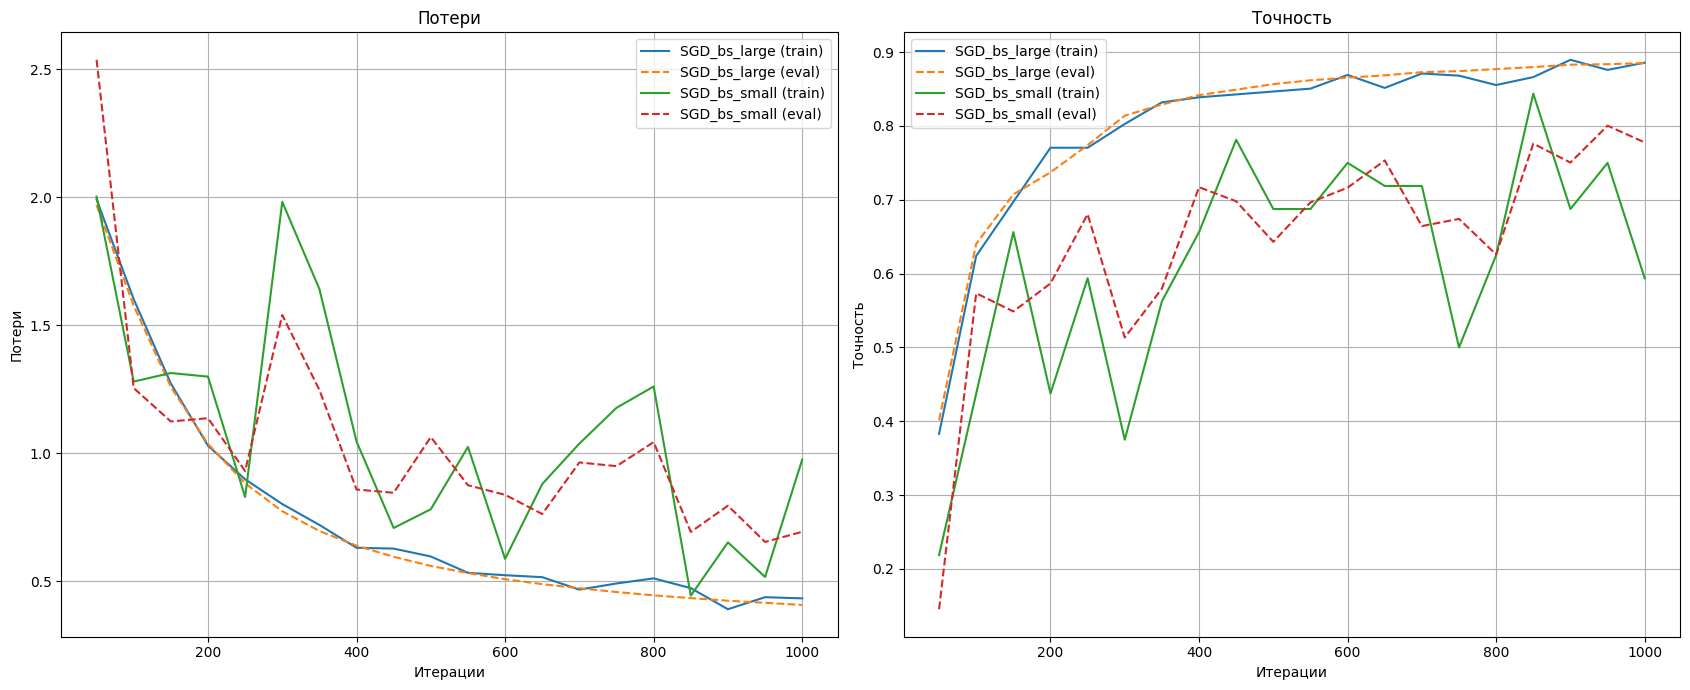

In [ ]:
# загрузка логов из вандб
api = wandb.Api()

project_name = "mmro_mmp"

runs = {
    "SGD_bs_large": None,
    "SGD_bs_small": None
}

for run in api.runs(project_name):
    if run.name in runs:
        runs[run.name] = run.history(keys=["train/loss", "train/accuracy", "eval/loss", "eval/accuracy", "_step"])

plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
for name, data in runs.items():
    if data is not None:
        plt.plot(data["_step"], data["train/loss"], label=f"{name} (train)")
        plt.plot(data["_step"], data["eval/loss"], label=f"{name} (eval)", linestyle="dashed")
plt.xlabel("Итерации")
plt.ylabel("Потери")
plt.title("Потери")
plt.legend()
plt.grid()

# График accuracy
plt.subplot(1, 2, 2)
for name, data in runs.items():
    if data is not None:
        plt.plot(data["_step"], data["train/accuracy"], label=f"{name} (train)")
        plt.plot(data["_step"], data["eval/accuracy"], label=f"{name} (eval)", linestyle="dashed")
plt.xlabel("Итерации")
plt.ylabel("Точность")
plt.title("Точность")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Мы видим, что при высокой дисперсии (в нашем случае это происходит, если мы берем маленький батч) обучение очень нестабильное и непоследовательное, и сходится он намного хуже, чем модель, где дисперсия низкая.

**Задание 7. (0.1 баллов)**: проверка **SVRG**

Выберите подмножество обучающего датасета, по которому будете считать "честный" градиент. Это может быть либо сам датасет, либо батч размера сильно больше, чем батч обучающей выборки.

**Важно: ** Убедитесь, что выбранный вами батч не смещен, т.е. присутствуют все классы в равных пропорциях

In [ ]:
def get_balanced_sample(dataset, sample_size):

    X, y = zip(*dataset)
    X, y = torch.stack(X), torch.tensor(y)

    classes = np.unique(y)
    n_classes = len(classes)

    samples_per_class = sample_size // n_classes

    indices = []
    for cls in classes:
        cls_indices = np.where(y == cls)[0]
        if len(cls_indices) > samples_per_class:
            cls_indices = np.random.choice(cls_indices, samples_per_class, replace=False)
        indices.extend(cls_indices)

    # Если количество индексов меньше sample_size, добавляем случайные индексы
    if len(indices) < sample_size:
        extra_indices = np.random.choice(len(y), sample_size - len(indices), replace=False)
        indices.extend(extra_indices)

    np.random.shuffle(indices)

    return X[indices], y[indices]


data = get_balanced_sample(train_dataset, len(train_dataset))

Для проверки корректности и адекватности реализации метода следует провести отладочные эксперименты. Основная задача отладочных экспериментов в максимально простых условиях проверить метод. В чем заключается проверка метода? Вы выдвигаете какую-то гипотезу (ожидаемое поведение) и проверяете как работает ваша реализация.

Для проверки корректности вашей реализации **SVRG**, для этого предлагается провести следующий эксперимент:

Если выбрать `S = 1`, то ожидается что обучение станет похожим на градиентный спуск, т.е. траектории обучения похожи на запуск с большим `batch_size`.

Обратите, что функция `step_fn` возвращает значения функций на батче обучающей выборки, т.е. значения достаточно шумные

In [ ]:
set_global_seed(42)

# Запуск SVRG с S=1
net = MnistClassifier(hidden_dim=10)
loss_fn = loss_fn_constructor(model=net, device=device)

optimizer = optim.SGD(net.parameters(), lr=1e-2)
svrg_wrapper = SVRG(optimizer=optimizer, loss_fn=loss_fn, data=data, S=1)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)
val_dataloader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

criterion_fn = nn.CrossEntropyLoss(reduction='mean')

svrg_log = train(1000, net, svrg_wrapper, criterion_fn, train_dataloader, val_dataloader, device, "SVRG_S1")


100%|██████████| 2/2 [03:10<00:00, 95.23s/it]


При правильной реализации accuracy на тесте будет  `∼0.88`

Насколько согласована реально полученная картина с ожиданиями? Сделайте выводы.
    

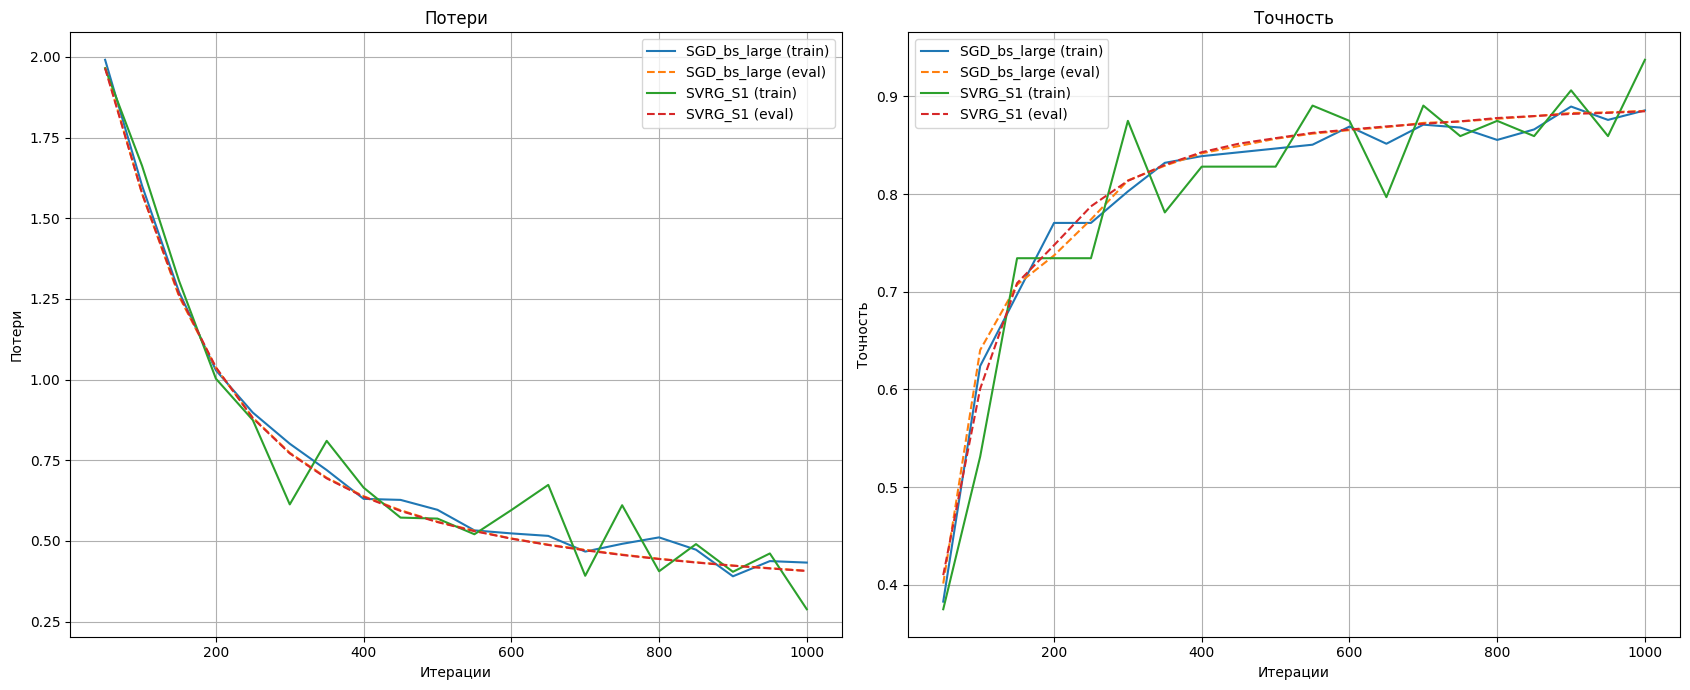

In [ ]:
# загрузка логов из вандб
api = wandb.Api()

project_name = "mmro_mmp"

runs = {
    "SGD_bs_large": None,
    "SVRG_S1": None
}

for run in api.runs(project_name):
    if run.name in runs:
        runs[run.name] = run.history(keys=["train/loss", "train/accuracy", "eval/loss", "eval/accuracy", "_step"])

plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
for name, data in runs.items():
    if data is not None:
        plt.plot(data["_step"], data["train/loss"], label=f"{name} (train)")
        plt.plot(data["_step"], data["eval/loss"], label=f"{name} (eval)", linestyle="dashed")
plt.xlabel("Итерации")
plt.ylabel("Потери")
plt.title("Потери")
plt.legend()
plt.grid()

# График accuracy
plt.subplot(1, 2, 2)
for name, data in runs.items():
    if data is not None:
        plt.plot(data["_step"], data["train/accuracy"], label=f"{name} (train)")
        plt.plot(data["_step"], data["eval/accuracy"], label=f"{name} (eval)", linestyle="dashed")
plt.xlabel("Итерации")
plt.ylabel("Точность")
plt.title("Точность")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Мы видим, что, с использованием SVRG, несмотря на маленький батч, дисперсия модели небольшая. Так что этот метод сочетает в себе довольно неплохую скорость работы (так как не приходится вычислять полный градиент на каждом шагу) и сходимость, что делает его хорошим компромиссом между GD и SDG.

**Задание 8. (1 балл)**: Эксперименты (если у вас 1 запуск занимает 1 минуту, то секция должна выполняться не более 16 минут)

Запуск будет считаться **корректным** если соблюдаются следующие правила:

1) Выберите подмножество обучающей выборки `data`, по которому будете считать честный градиент.

2) Так как цель метода, без особой вычислительной нагрузки уменьшить дисперсию, то размер `data` и значение `S` нужно выбрать разумными. Разумным считаются такие параметры, при которых количество подсчетов градиентов от элемента выборки во время обучения увеличиться не более чем в 6 раз.


Пример **НЕ** правильного подбора:

`batch_size = 2`

`len(data) = 50000`

`S = 1`


Каждая итерация обучения в среднем будет делать `50002` подсчетов градиента, вместо 2

Пример разумного подбора:

`batch_size = 2`

`len(data) = 256`

`S = 100`

Каждая итерация обучения в среднем будет делать `4.56` подсчетов градиента, вместо 2

**Важно**: правила можно нарушать для проверки и демонстрации граничных случаев, но базовые эксперименты все равно должны быть продемонстрированы

Цель эксперимента:

Продемонстрировать как меняется обучение от размера `data` и параметра `S`.

Необходимы минимум перебора параметров:

$S = 100, 300, 500$

$len(data) = 256$ и любой на ваше усмотрение, который согласуется с правилами выше.


Минимальные показатели, по которым должны быть сделаны выводы:

1) Лучшие показатели accuracy, loss на валидации

2) Поведение графиков на валидации и обучении

3) Дисперсия стохастического градиента

4) Время обучение модели

5) Максимальная занятая память (wandb логгирует)

6) Среднее число подсчетов градиентов на одной итерации обучения (за 1 подсчет считается вызов от 1 элемента выборки) (Формула выше в примерах описана)


Без учета поведения дисперсии стохастического градиента задание не будет засчитано!


**Важно:** не обязательно делать комбинаторный перебор, обычно достаточно более разумного подбора параметров


**Важно:** Вы можете менять все функции если вам необходимо, главное чтобы работало

**ОБЯЗАТЕЛЬНО НУЖНО ПРИКРЕПИТЬ ГРАФИКИ В НОУТБУК ИЛИ В ОТЧЕТ, НЕ ССЫЛКУ**


**ОЧЕНЬ ОЧЕНЬ ВАЖНО**: Все результаты должны сравниваться с обученными ранее моделями baseline. И делать выводы учитывая их. Нельзя исследовать метод в вакууме без хороших примеров для сравнения!

In [ ]:
def svrg_experiment(train_dataset, test_dataset, S_values, len_data_values, batch_values):

    for batch_size in batch_size_values:
        for len_data in len_data_values:
            for S in S_values:
                data = get_balanced_sample(train_dataset, len_data)

                train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True, drop_last=True)
                val_dataloader = DataLoader(test_dataset, 1024, shuffle=False)

                net = MnistClassifier(hidden_dim=10)
                loss_fn = loss_fn_constructor(model=net, device=device)

                optimizer = optim.SGD(net.parameters(), lr=1e-2)
                optimizer_wrapper = SVRG(optimizer=optimizer, loss_fn=loss_fn, data=data, S=S)

                criterion_fn = nn.CrossEntropyLoss(reduction='mean')

                train(
                    iters_num=1000,
                    net=net,
                    optimizer_wrapper=optimizer_wrapper,
                    criterion_fn=criterion_fn,
                    train_dataloader=train_dataloader,
                    valid_dataloader=val_dataloader,
                    device=device,
                    name=f"SVRG_S{S}_len{len_data}_batch{batch_size}"
                )



S_values = [100, 300, 500]
len_data_values = [256, 10000]
batch_size_values = [2, 512]


svrg_experiment(train_dataset, test_dataset, S_values, len_data_values, batch_size_values)


100%|██████████| 1/1 [00:53<00:00, 53.03s/it]


100%|██████████| 1/1 [00:52<00:00, 52.08s/it]


100%|██████████| 1/1 [00:54<00:00, 54.97s/it]


100%|██████████| 1/1 [00:55<00:00, 55.38s/it]


100%|██████████| 1/1 [00:53<00:00, 53.08s/it]


100%|██████████| 1/1 [00:53<00:00, 53.24s/it]


100%|██████████| 9/9 [02:55<00:00, 19.47s/it]


100%|██████████| 9/9 [02:54<00:00, 19.35s/it]


100%|██████████| 9/9 [02:55<00:00, 19.54s/it]


100%|██████████| 9/9 [02:55<00:00, 19.53s/it]


100%|██████████| 9/9 [02:54<00:00, 19.34s/it]


100%|██████████| 9/9 [02:54<00:00, 19.38s/it]



* Мы видим, что лучше всего себя показала модель с параметрами $S = 300, batch = 512, len(data) = 256$. У модели с этими параметрами самые низкие потери и самая высокая точность. При этом худшие результаты показывает модель с параметрами $S = 500, batch = 512, len(data) = 2$ - очень высокая дисперсия, так как при таких параметрах SVRG приближается к обычному SGD на малом батче.


* $S=500, len(data)=256, batch=2$ дает самую высокую дисперсию (редкое обновление градиента, маленький батч, шумный честный градиент).

    $S=100, len(data)=10000, batch=512$ дает самую низкую дисперсию (редкий шум, большие батчи).


* В целом видим, что при малом батче и большом S дисперсия начинает увеличиваться. Самая низкая дисперсия у нас на $S=100, len(data)=10000, batch=512$

* Дольше всех считалась модель с $len(data) = 10000, S = 500, batch = 512$ из-за затрат при подсчете полного градиента на достаточно большой выборке. Наибольшие ресурсы машина также потребляла на этих параметрах из-за схожих причин.

* Среднее количество подсчетов градиента:
$$
\begin{cases}
4.56, \quad batch\_size = 2, data\_size = 256, S = 100 \\
2.86, \quad batch\_size = 2, data\_size = 256, S = 300 \\
2.512, \quad batch\_size = 2, data\_size = 256, S = 500 \\
\end{cases}
$$

$$
\begin{cases}
102, \quad batch\_size = 2, data\_size = 10000, S = 100 \\
35.3, \quad batch\_size = 2, data\_size = 10000, S = 300 \\
22, \quad batch\_size = 2, data\_size = 10000, S = 500 \\
\end{cases}
$$

$$
\begin{cases}
4.56, \quad batch\_size = 512, data\_size = 256, S = 100 \\
2.86, \quad batch\_size = 512, data\_size = 256, S = 300 \\
2.512, \quad batch\_size = 512, data\_size = 256, S = 500 \\
\end{cases}
$$

$$
\begin{cases}
612, \quad batch\_size = 512, data\_size = 10000, S = 100 \\
545.3, \quad batch\_size = 512, data\_size = 10000, S = 300 \\
532, \quad batch\_size = 512, data\_size = 10000, S = 500 \\
\end{cases}
$$

Можно было делать не полный перебор, однако мне хотелось посмотреть полные данные на всевозможных комбинациях

**Бонус 1 (1 баллов)**: Уменьшить максимальное потребление видео памяти (обратить на внимание подсчета большого батча). Продемонстрировать как поменялось время обучение и потребление памяти.

**Бонус 2 (1.25 баллов)**: Проверить для других оптимизаторов влияние SVRG. При нашей реализации достаточно заменить базовый оптимизатор, на любой другой при создании обёртки. Сравнить сходимость метода и основные показатели

**Бонус 3 (1.25 баллов)**: Реализовать L-SVRG и сравнить результаты с SVRG и простым стохастическим градиентным спуском. Сравнить сходимость метода и основные показатели

**Бонус 4 (1.5 баллов)**: Реализовать метод [SAGA](https://www.di.ens.fr/~fbach/Defazio_NIPS2014.pdf) или любой другой метод понижения дисперсии (кроме батчирования). Описать идею метода. Сравнить сходимость метода и основные показатели

### Часть 4 (2.55 баллов). Методы Ньютона и LBFGS для пуассоновской регрессии.

В этой части задания вам предстоит обучить модель пуассоновской регрессии. Для этой задачи вы реализуете метод Ньютона и оракулы для Newton-CG и LBFGS.

###### Постановка задачи

Рассмотрим задачу количественной регрессии (count regression). Пусть дана выборка $\{x_i,y_i\}_{i=1}^\ell$, где $x_i\in\mathbb{R}^d$, $y_i\in\mathbb{N}\cup\{0\}$.

Будем считать, что
$$
y\sim p(y\,|\,\lambda)={e^{-\lambda}\over y!}\lambda^{y},
$$
где $\lambda=\exp(w^Tx)$.

Как вы могли догадаться, мы имеем дело с обобщённой линейной моделью. Обучение производится методом максимизации правдоподобия:
$$
p(X\,|\,w)=\prod_{i=1}^\ell p(y_i\,|\,x_i,w)\to\max_w\iff \mathcal{L}(x,y,w)=-\log p(y\,|\,\exp(w^Tx)),\ Q=\sum_{i=1}^\ell\mathcal{L}(x_i,y_i,w)\to\min_w.
$$

Алгоритм предсказания пуассоновской регрессии:
$$
a(x)=\lfloor\exp(w^Tx)\rfloor.
$$

**Задание 1. (0.5 баллов)**. Выведите формулы градиента $\nabla_wQ$ и гессиана $\nabla^2_wQ$.

**Решение:**

### Вывод градиента и гессиана для задачи оптимизации  

Рассмотрим функцию потерь для одного наблюдения:  
$$\mathcal{L}(x, y, w) = -\log p(y \mid \lambda),$$
где  
$$
p(y \mid \lambda) = \frac{\lambda^y e^{-\lambda}}{y!}, \quad \lambda = \exp(w^T x).
$$  
Подставляя $\lambda$, получаем:  
$$
\mathcal{L}(x, y, w) = -\left( y \log \lambda - \lambda - \log y! \right).
$$
Раскрывая логарифм, окончательно получаем:  
$$
\mathcal{L}(x, y, w) = -\left( y w^T x - \exp(w^T x) - \log y! \right).
$$

### Функция потерь на выборке  

Суммируя потери по всей обучающей выборке из $\ell$ примеров, получаем:  
$$
Q(w) = \sum_{i=1}^{\ell} \mathcal{L}(x_i, y_i, w) = -\sum_{i=1}^{\ell} \left( y_i w^T x_i - \exp(w^T x_i) - \log y_i! \right).
$$

### Градиент функции потерь  

Дифференцируя $Q(w)$ по $w$, получаем:  
$$
\nabla_w Q = -\sum_{i=1}^{\ell} \left( y_i x_i - \exp(w^T x_i) x_i \right).
$$  
Перепишем в матричной форме:  
$$
\nabla_w Q = -X^T (y - \lambda),
$$
где:  
- $X \in \mathbb{R}^{\ell \times d}$ — матрица признаков, где каждая строка $x_i^T$ представляет один объект,  
- $y \in \mathbb{R}^{\ell}$ — вектор наблюдаемых значений,  
- $\lambda \in \mathbb{R}^{\ell}$ — вектор предсказанных средних значений, где $\lambda_i = \exp(w^T x_i)$.

### Гессиан функции потерь  

Вторая производная по $w$ (гессиан) принимает вид:  
$$
\nabla^2_w Q = -\sum_{i=1}^{\ell} \left( -\exp(w^T x_i) x_i x_i^T \right).
$$  
Переписывая в матричной форме:  
$$
\nabla^2_w Q = X^T D X,
$$
где $D \in \mathbb{R}^{\ell \times \ell}$ — диагональная матрица с элементами $\lambda_i$ на главной диагонали:  
$$
D = \operatorname{diag}(\lambda_1, \lambda_2, \dots, \lambda_\ell).
$$

### Итоговый результат  

$$
\nabla_w Q = -X^T (y - \lambda),
$$
$$
\nabla^2_w Q = X^T D X.
$$  

Таким образом, градиент функции потерь выражается через разность между вектором истинных значений и вектором предсказанных средних, а гессиан получается в виде квадратичной формы, зависящей от матрицы объектов и диагональной матрицы предсказанных значений.


**Задание 2 (0.8 баллов)**. Реализуйте полученные формулы в виде функции оракула.

In [1]:
import numpy as np

class Oracle:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def fun(self, weights):
        """Compute objective, gradient, hessian"""
        lambda_ = np.exp(self.X @ weights)
        loss = -np.sum(self.y * (self.X @ weights) - lambda_)
        return loss

    def jac(self, weights):
        """Compute gradient. Use it for LBFGS, Newton-CG, Newton."""
        lambda_ = np.exp(self.X @ weights)
        grad = -self.X.T @ (self.y - lambda_)
        return grad

    def hess(self, weights):
        """Compute hessian. Use it for Newton."""
        lambda_ = np.exp(self.X @ weights)
        hess_x = self.X.T @ (lambda_[:, None] * self.X)
        return hess_x

    def hessp(self, weights, vector):
        """Compute `hessian-times-vector` product. Use it for Newton-CG"""
        hess = self.hess(weights)
        return hess @ vector


In [2]:
# Вспомогатейльный класс, который будет логгировать процесс обучения
from time import perf_counter


class Logger:
    def __init__(self):
        self.w = []
        self.time = []

    def __call__(self, weights):
        self.w.append(weights)

        if hasattr(self, 'prev'):
            self.time.append(perf_counter() - self.prev)

        self.prev = perf_counter()

**Задание 3. (0 баллов)**. Протестируем алгоритм на синтетических данных

In [3]:
def cartesian_product(*arrays):
    """https://stackoverflow.com/a/11146645"""
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

Датасет будет состоять из точек, взятых по сетке на прямоугольнике [0,3] x [0,3]

In [4]:
n_points_root = 50

x = np.linspace(0, 3, n_points_root)
y = np.linspace(0, 3, n_points_root)

features = cartesian_product(x, y)
features.shape

(2500, 2)

Зафиксируем золотое значение параметров:

In [6]:
w = np.array([0.7, -0.25])

Метки сгенерируем из пуассоновского распределения:

In [7]:
targets = np.random.poisson(np.exp(features @ w))
targets.shape

(2500,)

Визуализируем выборку:

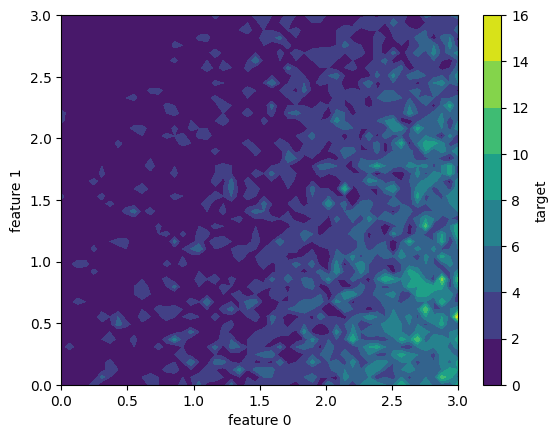

In [8]:
import matplotlib.pyplot as plt

def visualise(z):
    ax = plt.contourf(x, y, z.reshape(n_points_root, n_points_root).T)
    cbar = plt.colorbar(ax)
    cbar.ax.set_ylabel('target')
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.show()

visualise(targets)

Следующая ячейка должна выполняться без ошибок **(иначе -0.4 балла)**

In [9]:
from scipy.optimize import minimize

oracle = Oracle(features, targets)
cb = Logger()
weights = np.random.normal(size=2)
res = minimize(
    oracle.fun, weights,
    method="L-BFGS-B",
    jac=oracle.jac,
    callback=cb
)
res

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -518.9272576339235
        x: [ 6.998e-01 -2.445e-01]
      nit: 9
      jac: [ 3.791e-05  2.413e-05]
     nfev: 11
     njev: 11
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

Результат `res` должен содержать информацию об успешной оптимизации, а полученные веса должны быть похожи на те, что заданы выше:

In [10]:
res['x']

array([ 0.69983412, -0.24447907])

Визуализируйте предсказания:

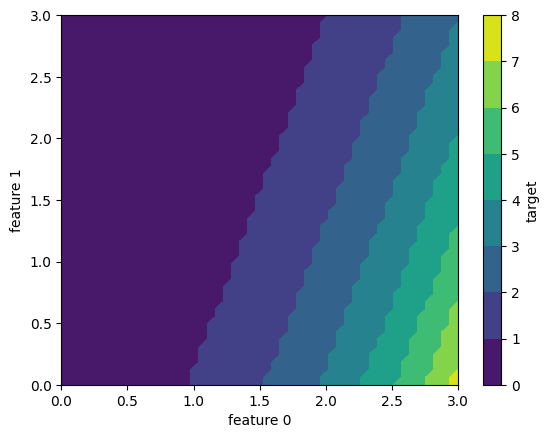

In [11]:
pred = np.floor(np.exp(features @ res['x']))

visualise(pred)

Следующая ячейка должна выполняться без ошибок и сообщать об успешной оптимизации **(иначе -0.4 балла)**:

In [12]:
oracle = Oracle(features, targets)
cb = Logger()
weights = np.random.normal(size=2)
res = minimize(
    oracle.fun, weights,
    method="Newton-CG",
    jac=oracle.jac,
    hessp=oracle.hessp,
    callback=cb,
)
res

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -518.9272575896691
       x: [ 6.998e-01 -2.445e-01]
     nit: 8
     jac: [ 1.025e-01  9.514e-02]
    nfev: 11
    njev: 11
    nhev: 11

In [13]:
res['x']

array([ 0.69983156, -0.24447539])

**Задание 4 (0.25 баллов)**. Реализуйте бектрекинг по правилу Армихо.

In [14]:
def line_search(f, grad, x, d, c=1e-4, rho=0.9, tol=1e-3, alpha0=1):
    """
    Line search for learning rate with Armijo condition.

    Params
    ------
    f: objective function
    grad: vector
    x: current solution of optimization problem
    d: direction along which to search
    alpha0: initialization for alpha

    Return
    ------
    alpha: lr for newton step
    """
    alpha = alpha0
    fx = f(x)
    grad_x = grad(x)
    derivative = np.dot(grad_x, d)

    while f(x + alpha * d) > fx + c * alpha * derivative:
        alpha *= rho
        if alpha < tol:
            break

    return alpha

**Задание 5. (0.25 баллов)**. Реализуйте демпфированный метод Ньютона. В качестве критерия останова используйте норму градиента (гиперпараметр `tol`).

*Замечание.* callback вызывать в конце каждой итерации.

In [48]:
from scipy.optimize import OptimizeResult


def Newton(fun, x0, *args, **kwargs) -> OptimizeResult:
    # helper functions
    callback = kwargs['callback']
    jac = kwargs['jac']
    hess = kwargs['hess']

    # hyper params
    max_iter = kwargs['max_iter']
    tol = kwargs['tol']
    alpha0 = kwargs['alpha0']

    x = x0
    for t in range(1, max_iter + 1):
        grad = jac(x)
        if np.linalg.norm(grad) < tol:
            break

        H = hess(x)
        p = -np.linalg.solve(H, grad)  # направление Ньютона

        # Линейный поиск (демпфирование)
        alpha = alpha0
        while fun(x + alpha * p, *args) > fun(x, *args):
            alpha *= 0.5

        x = x + alpha * p

        callback(x)

    return OptimizeResult(
        fun = fun(x),                 # resulting loss value
        x = x,                      # optimal weights
        n_it = t,                   # number of iterations used
        success = (t != max_iter)   # flag of success
    )

Следующая ячейка должна выполняться без ошибок и сообщать об успешной оптимизации

In [49]:
oracle = Oracle(features, targets)
cb = Logger()
weights = np.random.normal(size=2)
res = minimize(
    oracle.fun, weights,
    method=Newton,
    jac=oracle.jac,
    hess=oracle.hess,
    callback=cb,
    options=dict(
        tol=0.1,
        max_iter=10,
        alpha0=1
    )
)
res

 success: True
     fun: -518.9272576339235
       x: [ 6.998e-01 -2.445e-01]
    n_it: 8

**Задание 6 (0.75 баллов)**. Применим методы к реальным данным

Применим наши три алгоритма к реальным данным. Источник данных: https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes.

Описание к датасету:
> Is there a relationship between the number of bicyclists who use different bike paths on the same day? Can you predict how many riders there will be on one path given how many are on another?

In [62]:
import pandas as pd

df = pd.read_csv('dataset.csv')
target = df['target']
features = df.drop(columns=['target'])
print(features.shape, target.shape)
features.head()

(319, 18) (319,)


lane_0  lane_1  lane_2  lane_3  lane_4  lane_5  lane_6  lane_7  lane_8  \
0      12       4      17      49      21      16      16       7      58   
1       7       5      15     113      27       9      32      11     109   
2       7       3       7     107      36      12      18       2      71   
3       1      21       0      35      29       1       0       0       6   
4       0       2       0      90      21       1       1       6       0   

   lane_9  lane_10  lane_11  lane_12  lane_13  lane_14  lane_15  month  day  
0      91       24        3       17       78       21        6      1    1  
1     177       32       13       11       57       77        4      2    1  
2     131       33        5       14      174       40        5      3    1  
3      11        6        1        1       20        6        0      4    1  
4       5       49       20        0       41       56       10      5    1

Следующая ячейка кодирует временные признаки и нормирует все остальные:

In [63]:
# cycle encode time features
data = features[['month', 'day']].copy()
data['month_sin'] = np.sin(2 * np.pi * data['month']/31)
data['month_cos'] = np.cos(2 * np.pi * data['month']/31)

data['day_sin'] = np.sin(2 * np.pi * data['day']/12)
data['day_cos'] = np.cos(2 * np.pi * data['day']/12)

# normalize other features
data2 = features.drop(columns=['month', 'day'])
data2 = (data2 - data2.mean()) / data2.std()

# add constant feature
n_samples = df.shape[0]
features = pd.concat([data2, data[['month_sin', 'month_cos', 'day_sin', 'day_cos']]], axis=1)
features['constant'] = np.ones(n_samples)
features.head()

lane_0    lane_1    lane_2    lane_3    lane_4    lane_5    lane_6  \
0 -1.200839 -1.221582 -1.198296 -0.880348 -1.079269 -1.131425 -1.228446   
1 -1.203568 -1.221154 -1.200379 -0.854252 -1.072729 -1.138488 -1.217139   
2 -1.203568 -1.222010 -1.208713 -0.856698 -1.062920 -1.135461 -1.227033   
3 -1.206841 -1.214309 -1.216004 -0.886056 -1.070549 -1.146560 -1.239754   
4 -1.207387 -1.222437 -1.216004 -0.863630 -1.079269 -1.146560 -1.239047   

     lane_7    lane_8    lane_9  ...   lane_11   lane_12   lane_13   lane_14  \
0 -0.930486 -1.294226 -1.352611  ... -0.885145 -1.279551 -1.326210 -1.226873   
1 -0.927173 -1.263520 -1.311771  ... -0.841856 -1.285154 -1.341468 -1.192567   
2 -0.934626 -1.286399 -1.333616  ... -0.876487 -1.282353 -1.256462 -1.215233   
3 -0.936282 -1.325534 -1.390602  ... -0.893802 -1.294493 -1.368350 -1.236062   
4 -0.931314 -1.329146 -1.393451  ... -0.811554 -1.295427 -1.353092 -1.205432   

    lane_15  month_sin  month_cos  day_sin   day_cos  constant  
0 -1.162284   0.201299   0.979530      0.5  0.866025       1.0  
1 -1.170318   0.394356   0.918958      0.5  0.866025       1.0  
2 -1.166301   0.571268   0.820763      0.5  0.866025       1.0  
3 -1.186386   0.724793   0.688967      0.5  0.866025       1.0  
4 -1.146217   0.848644   0.528964      0.5  0.866025       1.0  

[5 rows x 21 columns]

In [65]:
X = features.to_numpy()
y = target.to_numpy()

X.shape, y.shape

((319, 21), (319,))

Разделите выборку случайно на трейн и тест в отношении 9:1, зафиксируйте `seed=0`. Обучите следующие алгоритмы и измерьте качество на отложенной выборке:

- LBFGS
- Newton-CG
- Newton
- `sklearn.linear_model.PoissonRegressor`

**Замечание.** Если для метода Ньютона раз в несколько запусков появляется ошибка `singular matrix`, то ничего страшного (наверное). Если метод часто расходится, то попробуйте поварьировать параметр `alpha0` или другие параметры бектрекинга.

**Подсказка.** Меряйте качество на отложенной выборке так: `np.mean((np.log(pred + 1) - np.log(y + 1)) ** 2)`.

**(!)** Для каждого алгоритма постройте scatterplot для пар (true, pred) на трейне и на тесте, который покажет, как плохи/хороши полученные предсказания.

**(!)** Сделайте выводы о полученных результатах. Насколько они согласуются с вашими ожиданиями?

<ipython-input-1-181f1b05708c>:10: RuntimeWarning: overflow encountered in exp
  lambda_ = np.exp(self.X @ weights)
<ipython-input-1-181f1b05708c>:16: RuntimeWarning: overflow encountered in exp
  lambda_ = np.exp(self.X @ weights)
<ipython-input-1-181f1b05708c>:17: RuntimeWarning: invalid value encountered in matmul
  grad = -self.X.T @ (self.y - lambda_)
<ipython-input-1-181f1b05708c>:10: RuntimeWarning: overflow encountered in exp
  lambda_ = np.exp(self.X @ weights)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


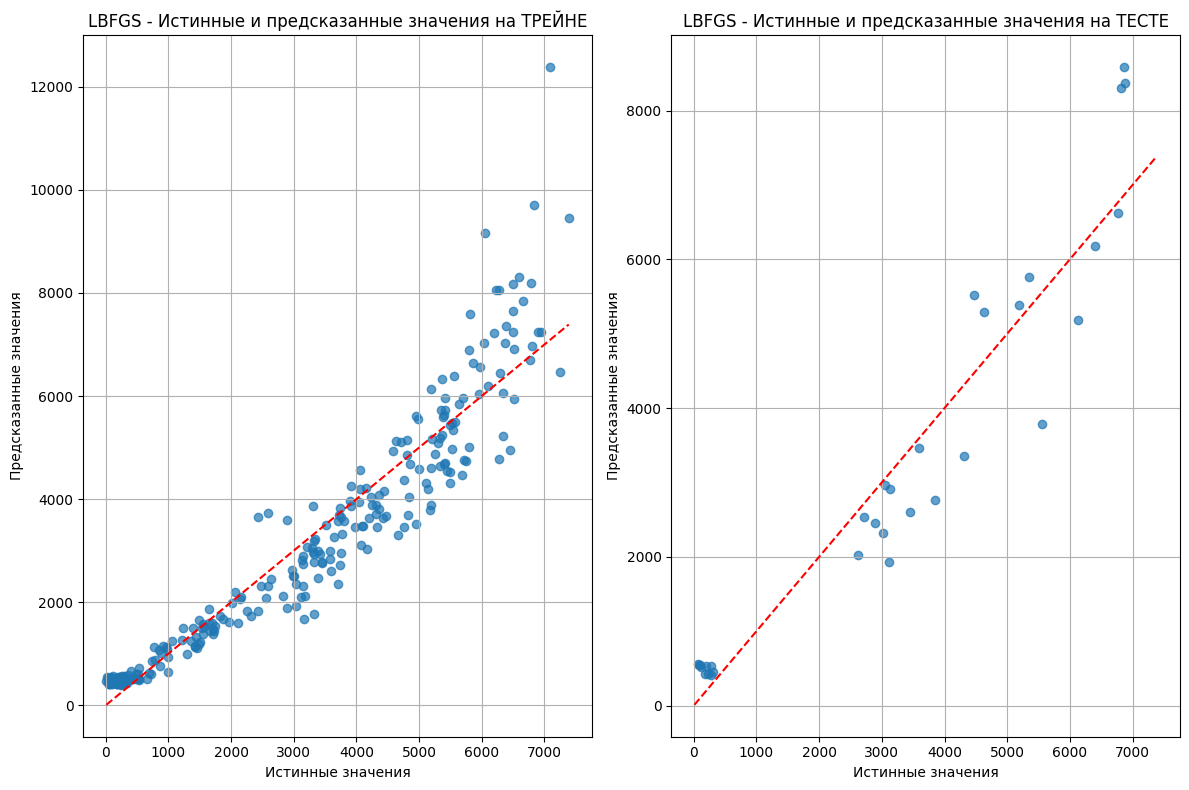

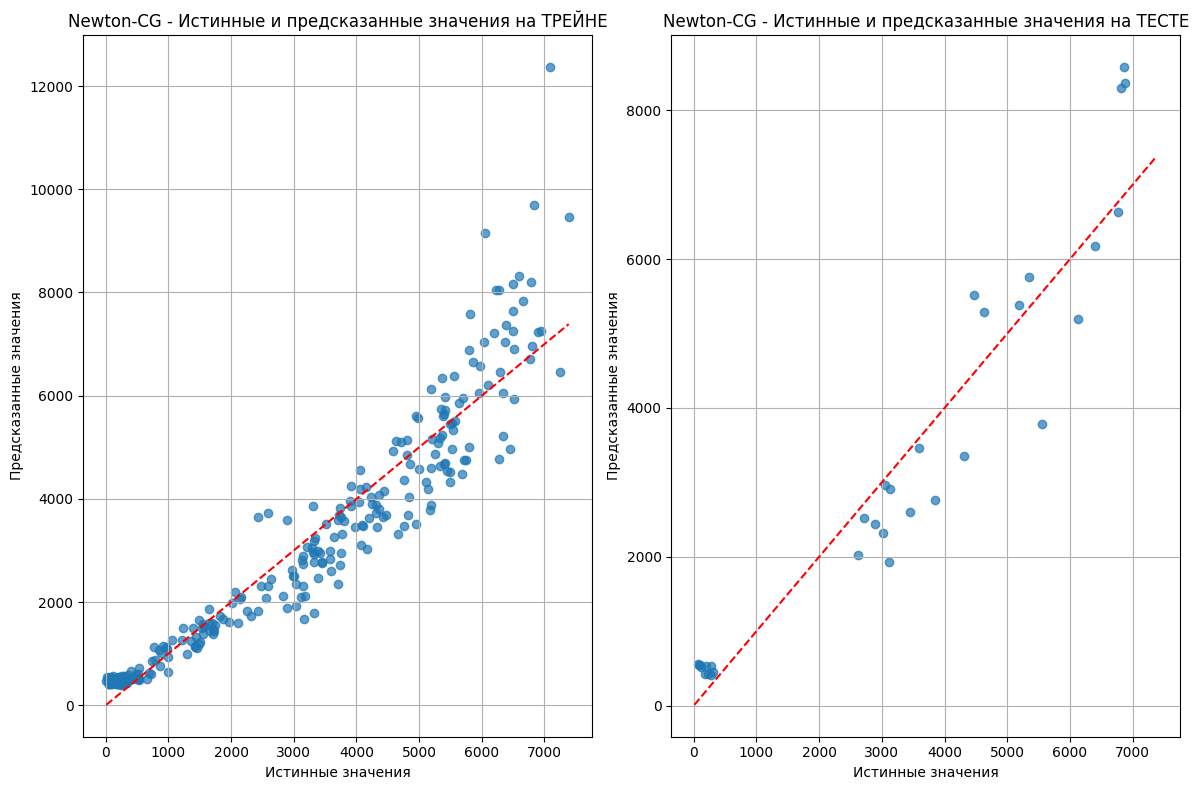

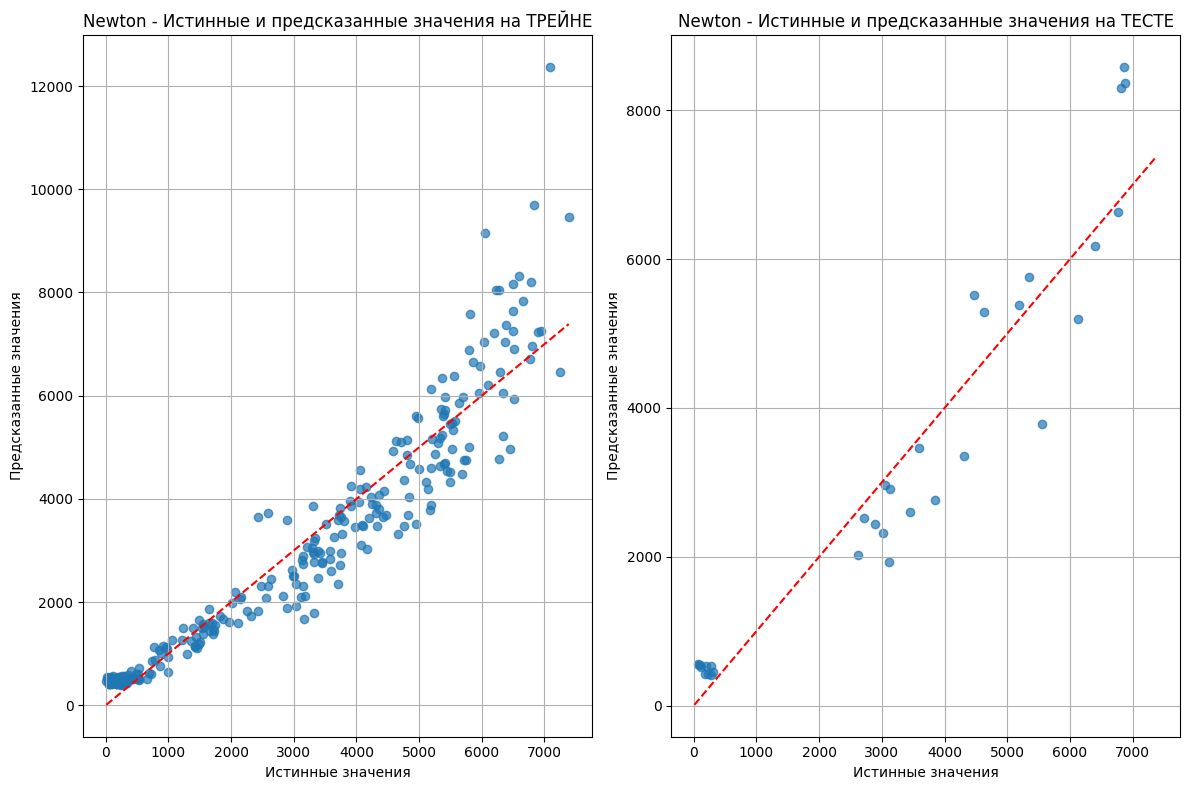

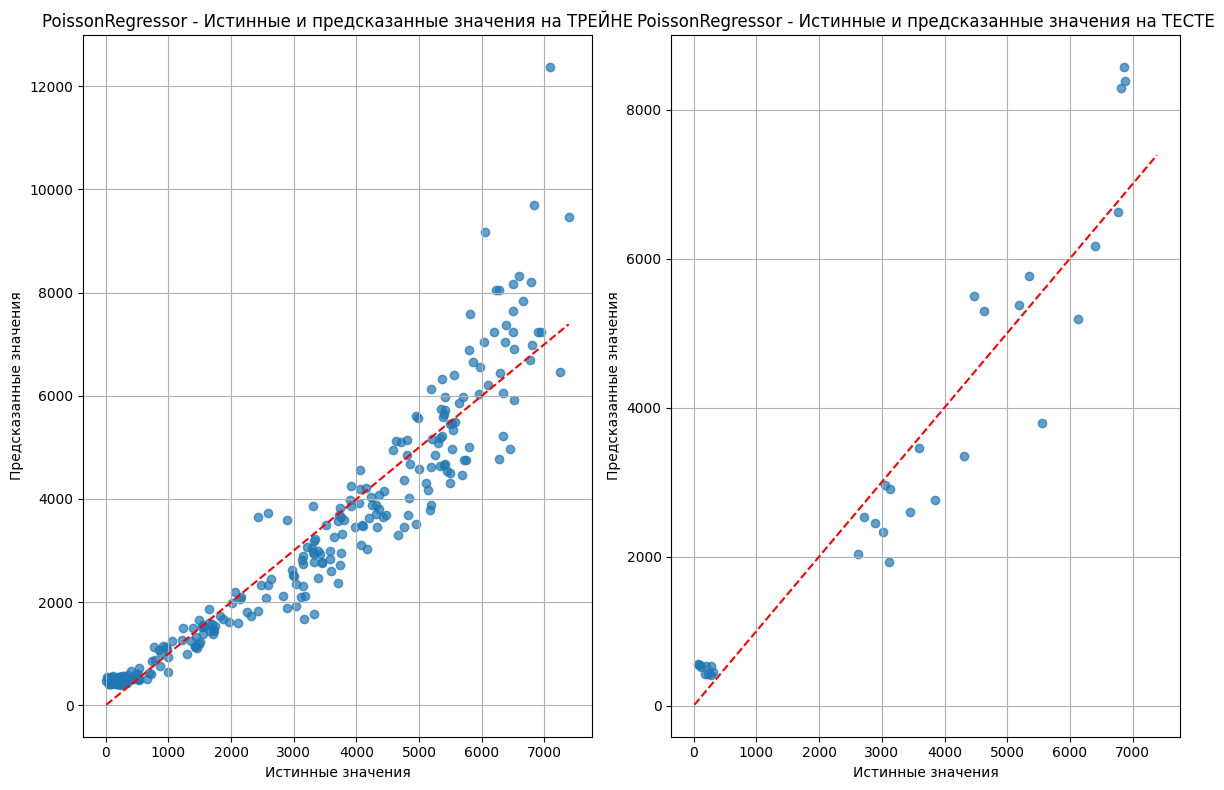

LBFGS - потери на Трейне: 0.47256100786546174, потери на Тесте: 0.5220949007316693
Newton-CG - потери на Трейне: 0.4724828248649641, потери на Тесте: 0.5220506126277533
Newton - потери на Трейне: 0.4724822052777141, потери на Тесте: 0.5220503924482587
PoissonRegressor - потери на Трейне: 0.4722682299441815, потери на Тесте: 0.5216857402560406


In [72]:
### YOUR ADVENTURE STARTS HEREz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
oracle_train = Oracle(X_train, y_train)
oracle_test = Oracle(X_test, y_test)

def compute_loss(pred, y):
    return np.mean((np.log(pred + 1) - np.log(y + 1)) ** 2)

def train_with_optimizer(oracle, method, cb):
    initial_weights = np.random.normal(size=oracle.X.shape[1])
    if method == 'LBFGS':
        result = minimize(oracle.fun, initial_weights, jac=oracle.jac, method='L-BFGS-B', callback=cb)
    elif method == 'Newton-CG':
        result = minimize(oracle.fun, initial_weights, jac=oracle.jac, hessp=oracle.hessp, method='Newton-CG', callback=cb)
    elif method == 'Newton':
        result = Newton(oracle.fun, initial_weights, jac=oracle.jac, hess=oracle.hess, callback=cb)
    return result.x, result.fun

def train_poisson_regressor(X_train, y_train):
    model = PoissonRegressor(alpha=1e-6)
    model.fit(X_train, y_train)
    return model

methods = ['LBFGS', 'Newton-CG', 'Newton']
results = {}

for method in methods:
    logger = Logger()
    weights, _ = train_with_optimizer(oracle_train, method, cb=logger)
    pred_train = np.exp(X_train @ weights)
    pred_test = np.exp(X_test @ weights)
    results[method] = {
        'train_pred': pred_train,
        'test_pred': pred_test,
        'train_loss': compute_loss(pred_train, y_train),
        'test_loss': compute_loss(pred_test, y_test)
    }

poisson_model = train_poisson_regressor(X_train, y_train)
poisson_train_pred = poisson_model.predict(X_train)
poisson_test_pred = poisson_model.predict(X_test)

results['PoissonRegressor'] = {
    'train_pred': poisson_train_pred,
    'test_pred': poisson_test_pred,
    'train_loss': compute_loss(poisson_train_pred, y_train),
    'test_loss': compute_loss(poisson_test_pred, y_test)
}

for method, res in results.items():
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs[0].scatter(y_train, res['train_pred'], alpha=0.7)
    axs[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
    axs[0].set_title(f'{method} - Истинные и предсказанные значения на ТРЕЙНЕ')
    axs[0].set_xlabel('Истинные значения')
    axs[0].set_ylabel('Предсказанные значения')
    axs[0].grid(True)

    axs[1].scatter(y_test, res['test_pred'], alpha=0.7)
    axs[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
    axs[1].set_title(f'{method} - Истинные и предсказанные значения на ТЕСТЕ')
    axs[1].set_xlabel('Истинные значения')
    axs[1].set_ylabel('Предсказанные значения')
    axs[1].grid(True)
    plt.tight_layout()
    plt.show()

for method, res in results.items():
    print(f'{method} - потери на Трейне: {res["train_loss"]}, потери на Тесте: {res["test_loss"]}')

Самые неплохие результаты показал метод Newton, однако в целом видим, что все методы показали хорошие результаты (сравниваем распределение точек относительно линии).

### Часть 5. (1.5 баллов) CVXPY

Для анализа изображений часто используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)).
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение.
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Задание 0. (0.15 баллов)** Как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная не отрицательность?

**Ответ:**

Такую задачу можно решать с помощью cvxpy, если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях решить точно задачу относительно параметра $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и найти решение задачи относительно $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами.

Загрузим данные. Мы будем раскладывать изображения лиц. О таком подходе к анализу фотографий лиц вам рассказывали или расскажут в курсе ОиРИ, а тут вы просто реализуете этот метод

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Shape of data = (400, 64, 64)


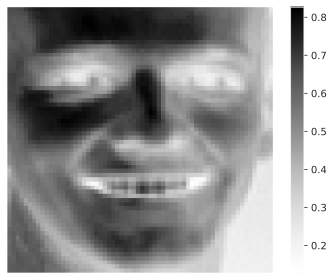

In [29]:
import cvxpy as cvx
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np
print("Shape of data = {}".format(data["images"].shape))
index = 42
plt.imshow(data["images"][index], cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

**Задание 1. (1.05 балл)** Реализуйте с помощью cvxpy идею попеременной оптимизации для этой задачи и решите её

*Совет от Соника:* Сперва тестируйте алгоритм не на всех данных, так как вычисления занимают большое количество времени

*Замечание*: все еще можно менять интерфейсы функций

**Важное замечание.**

Если у вас уходит больше трех минут на итерацию, то скорее всего что-то идет не так. Алгоритм действий в таком случае:
1) Проверить, что стоит нормальный солвер (авторское решение на CLARABEL, его нужно поставить отдельно и перезапустить среду);
2) Не использовать Colab, так как там используются старые CPU, и вычисления на них могут быть слишком медленные;
3) Уменьшить размер данных;
4) Использовать ранг поменьше.

In [31]:
def non_negative_matrix_factorization(X, rank, max_iters, tol, log=False):
    """
    X - матрица изображений. Каждое изображение является строкой
    rank - какой будете использовать ранг
    max_iters - максимальное количество итераций
    tol - точность, с какой решается задача
    log - флаг, отвечающий за то, будете ли вы печатать логи или нет (такое желание может возникнуть, так как
    алгоритм будет работать долго)
    Функция возвращает найденные матрицы H и W, а также значения функционала в ходе оптимизации
    """
    m, n = X.shape

    W = np.abs(np.random.rand(m, rank))
    H = np.abs(np.random.rand(rank, n))

    W_var = cvx.Variable((m, rank), nonneg=True)
    H_var = cvx.Variable((rank, n), nonneg=True)

    objective_values = []

    for iter_num in range(max_iters):

        objective_W = cvx.Minimize(0.5 * cvx.norm(X - W_var @ H, "fro")**2)
        problem_W = cvx.Problem(objective_W)
        problem_W.solve(solver=cvx.SCS)
        W = W_var.value

        objective_H = cvx.Minimize(0.5 * cvx.norm(X - W @ H_var, "fro")**2)
        problem_H = cvx.Problem(objective_H)
        problem_H.solve(solver=cvx.SCS)
        H = H_var.value

        current_objective = problem_W.value
        objective_values.append(current_objective)

        if iter_num > 0 and np.abs(objective_values[-1] - objective_values[-2]) < tol:
            break

        if log:
            print(f"Iteration {iter_num + 1}, Objective value: {objective_values[-1]}")

    return H, W, objective_values

Iteration 1, Objective value: 25369.02000972304
Iteration 2, Objective value: 6392.762090366804
Iteration 3, Objective value: 5295.597268317239
Iteration 4, Objective value: 4931.988478793606
Iteration 5, Objective value: 4741.011357155475
Iteration 6, Objective value: 4619.272241284547
Iteration 7, Objective value: 4534.628301308989
Iteration 8, Objective value: 4473.643841742497
Iteration 9, Objective value: 4428.508164798449
Iteration 10, Objective value: 4393.206943362415
Iteration 11, Objective value: 4364.176615358201
Iteration 12, Objective value: 4339.290120614967
Iteration 13, Objective value: 4317.97163380758
Iteration 14, Objective value: 4299.127272618911
Iteration 15, Objective value: 4282.739895848562


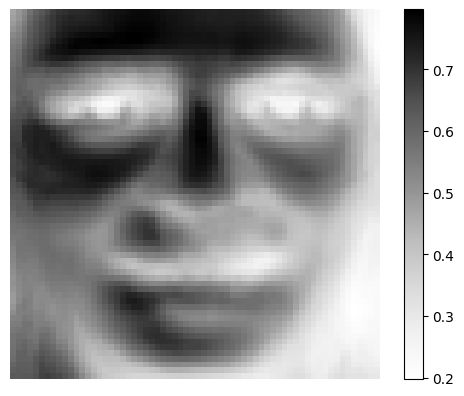

In [8]:
rank = 18
max_iters = 15 #17
tol = 1

X = data["images"]
X_flat = X.reshape(X.shape[0], -1)

H, W, objective_values = non_negative_matrix_factorization(X_flat, rank, max_iters, tol, log=True)

reconstructed_image = W @ H
reconstructed_image = reconstructed_image[index].reshape(64, 64)

plt.imshow(reconstructed_image, cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")
plt.show()

**Задание 2. (0.1 балл)** Нарисуйте график сходимости по функции и убедитесь, что метод сошёлся или же изменение целевой функции пренебрежимо мало

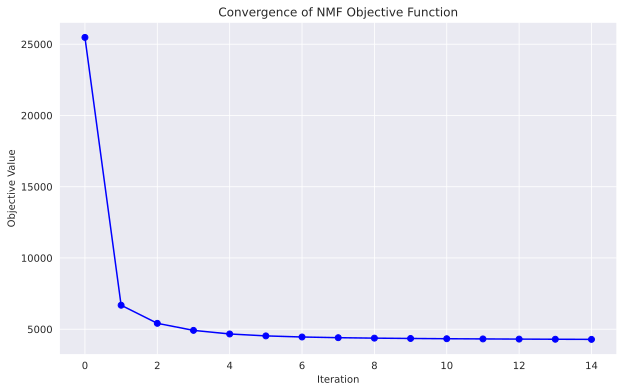

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(objective_values, marker='o', linestyle='-', color='b')
plt.title("Convergence of NMF Objective Function")
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.grid(True)
plt.show()

**Задание 3. (0.1 баллов)** Поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналогично тому, как были собраны строки матрицы $X$. Нарисуйте 10 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос задания 0?

*Hint:* Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

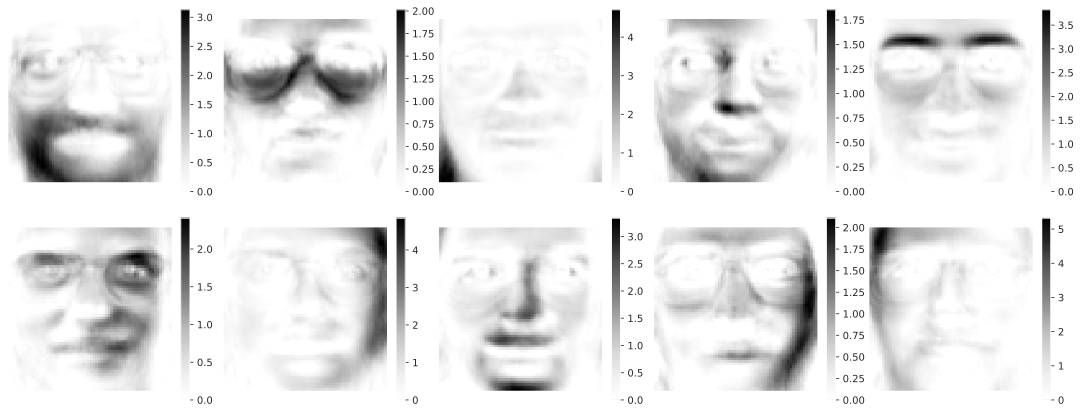

In [40]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.ravel()):

    basis_image = H[i].reshape(64, 64)
    im = ax.imshow(basis_image, cmap=plt.cm.Greys)
    ax.axis("off")
    plt.colorbar(im, ax=ax, fraction=0.05, pad=0.05)

plt.tight_layout()
plt.show()

Мы видим, что H выделяет определенные черты лиц человека, которые являются базисными элементами.

**Задание 4. (0.1 баллов)** Нарисуйте матрицу $W$ с помощью функции `plt.imshow` (или `plt.spy`). Насколько сильно она заполнена и почему?

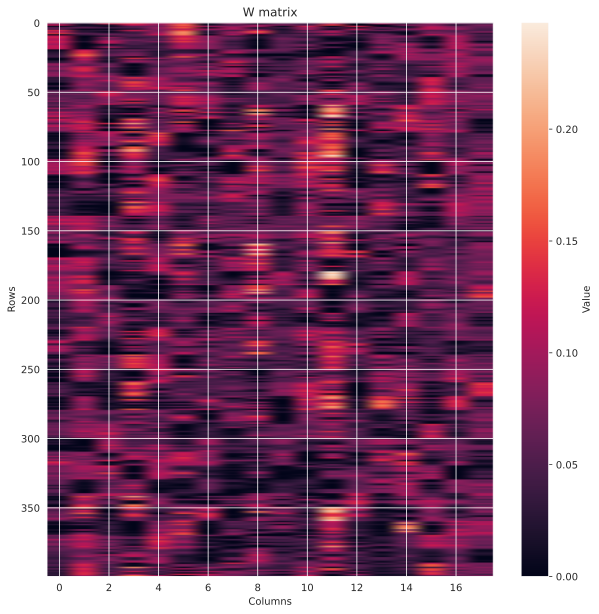

In [43]:
plt.figure(figsize=(10, 10))
plt.imshow(W, aspect="auto")
plt.colorbar(label="Value")
plt.title('W matrix')
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### Бонус

В матрице $W$ есть довольно много ненулевых элементов. Это связано с тем, что каждое изображение представляется через линейную комбинацию базисных компонентов, однако лица содержат множество характерных деталей, из-за чего их сложно выразить через небольшое число базисных элементов.

**Задание. (0.7 баллов)** Пробудите в себе внутреннего мемодела и придумайте мемный шедевр на тему ваших взаимоотношений с методами оптимизации.

**Ваш мем:**

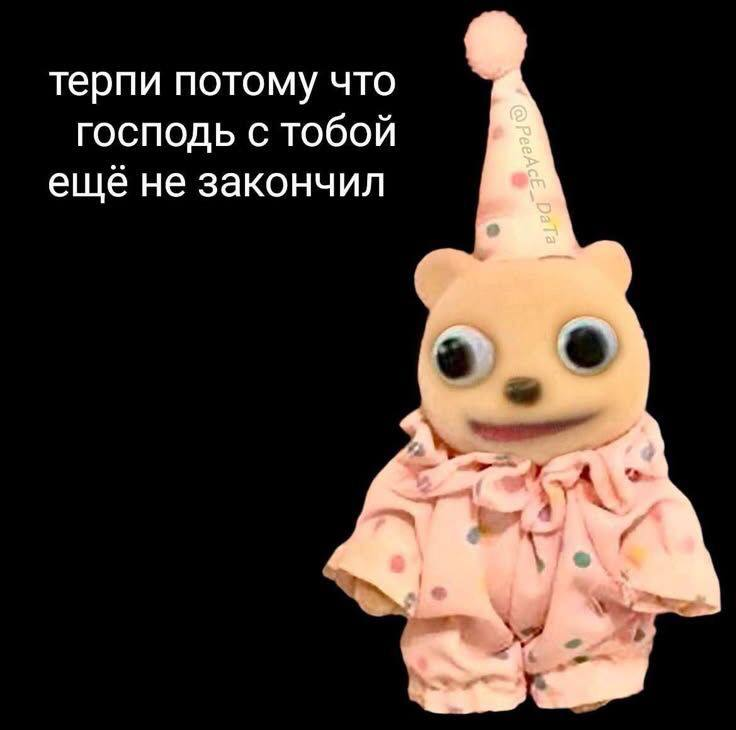